# **<a>Assignment_1**
**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

# <a> Data Scientists Jobs

<img src="http://warsanpay.com/images/slider2.gif" width="400">

[source](http://warsanpay.com/index.html)


> # <a> Question (2)

> * Analyze the quality of data (all columns) and report statistics of missing data
and outliers. Briefly describe your step and findings.

    > * I will answer this question separately for each column


# Read dataset and perform basic data exploration.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import missingno as msno

# to load the data from my Google Drive
from google.colab import drive

In [2]:
# drive path.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Read the dataset into a DataFrame named `df`

>Examine the first 5 rows of the DataFrame (known as the `head`).

In [3]:
# My code here to perform data type and data scale check
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DA/Assign_1/data1.csv")

# check the first five rows of the training data
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


> If we want to see what all the data types are in a dataframe, use `df.dtypes` or  the `df.info()` function shows even more useful info.

In [4]:
# summary of the data including non-null counts

# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          16160 non-null  object 
 1   Salary Estimate    16160 non-null  object 
 2   Job Description    16160 non-null  object 
 3   Rating             16160 non-null  float64
 4   Company Name       16158 non-null  object 
 5   Location           16160 non-null  object 
 6   Headquarters       16160 non-null  object 
 7   Size               16160 non-null  object 
 8   Founded            16160 non-null  int64  
 9   Type of ownership  16160 non-null  object 
 10  Industry           16160 non-null  object 
 11  Sector             16160 non-null  object 
 12  Revenue            16160 non-null  object 
 13  Competitors        16160 non-null  object 
 14  Easy Apply         16160 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.8+ MB


> **Notes on the previous cell** : 

> After looking at the automatically assigned data types, the types of data are `float` , `int` and `object`

# The Dataset 

> This dataset contains 16,000+ job listing for data science jobs (all assumed to be open positions at the time the dataset), with features such as:

> * Job Title
* Salary Estimate
* Job Description
* Rating
* Company Name and more...

# Preparing dataset for the EDA

> Let's look at the missing values.

In [5]:
# we will call this method several time 
def ratio_meth():
  # you can also count the ratio of missing values
  total_miss = df.isnull().sum()
  # Percentage of missing values
  percent_miss = (total_miss/df.isnull().count()*100)

  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  print(missing_data.sort_values(by='Total missing',ascending=False))

ratio_meth()

                   Total missing  % missing
Company Name                   2   0.012376
Job Title                      0   0.000000
Salary Estimate                0   0.000000
Job Description                0   0.000000
Rating                         0   0.000000
Location                       0   0.000000
Headquarters                   0   0.000000
Size                           0   0.000000
Founded                        0   0.000000
Type of ownership              0   0.000000
Industry                       0   0.000000
Sector                         0   0.000000
Revenue                        0   0.000000
Competitors                    0   0.000000
Easy Apply                     0   0.000000


> **Notes on the previous cell** : 

> We have only `two` missing values. But, as we can see at the top `5` rows of the data we can see `-1` 

> In most real-world datasets, unknown and missing values are not recorded in the same way that a software-recognizable version of the missing value is. We need to be able to spot them and deal with them. So, let's use (-1) as a fictitious value.

> But the types of data are `float` , `int` and `object` . So, some columns have values `(-1, -1.0, '1')` that are not compatible with the column contents. It is necessary to replace these values with np.nan.

> **Note:** If you notice that `Easy Apply` column contains only two unique values ` ['-1', 'TRUE'] ` . So, the second value through logic must be a `FALSE` value.

> let's replace TRUE values in Easy Apply column with 1 and replace -1 values in Easy Apply column with 0

In [6]:
# get unique values in column
df['Easy Apply'].unique()

array(['-1', 'TRUE'], dtype=object)

In [7]:
# to replace TRUE values in Easy Apply column with 1.
df['Easy Apply'] = df['Easy Apply'].replace('TRUE',1)

# to replace -1 values in Easy Apply column with 0.
df['Easy Apply'] = df['Easy Apply'].replace('-1',0)

In [8]:
# To make sure everything is working fine.
df['Easy Apply'].unique()

array([0, 1])

In [9]:
# to replace int values with np.nan.
df.replace(-1, np.nan, inplace=True)

# to replace float values with np.nan.
df.replace(-1.0, np.nan, inplace=True)

# to replace object values with np.nan.
df.replace('-1', np.nan, inplace=True)

In [10]:
# to see if we still have only two missing value

# just call this fun.
ratio_meth()

                   Total missing  % missing
Competitors                11824  73.168317
Founded                     4249  26.293317
Industry                    2291  14.176980
Sector                      2288  14.158416
Rating                      1596   9.876238
Headquarters                 968   5.990099
Size                         924   5.717822
Type of ownership            924   5.717822
Revenue                      924   5.717822
Salary Estimate               46   0.284653
Company Name                   2   0.012376
Job Title                      0   0.000000
Job Description                0   0.000000
Location                       0   0.000000
Easy Apply                     0   0.000000


# Exploratory Data Analysis

> 

> If a column contains a lot of missing values, say more than `50%` , and the feature is not significant, you might want to delete that feature.


In [11]:
# source : thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/

# Delete columns containing either 50% or more than 50% NaN Values
perc = 50.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [12]:
# To make sure everything is working fine.
# just call this fun.
ratio_meth()

                   Total missing  % missing
Founded                     4249  26.293317
Industry                    2291  14.176980
Sector                      2288  14.158416
Rating                      1596   9.876238
Headquarters                 968   5.990099
Size                         924   5.717822
Type of ownership            924   5.717822
Revenue                      924   5.717822
Salary Estimate               46   0.284653
Company Name                   2   0.012376
Job Title                      0   0.000000
Job Description                0   0.000000
Location                       0   0.000000
Easy Apply                     0   0.000000


> Check for `duplicate` values.

In [13]:
# to count the duplicated values.
df.duplicated().value_counts()

False    16137
True        23
dtype: int64

> Till now , we have got an overview to dataset to fix any issues before dealing with the missing and duplicated values.

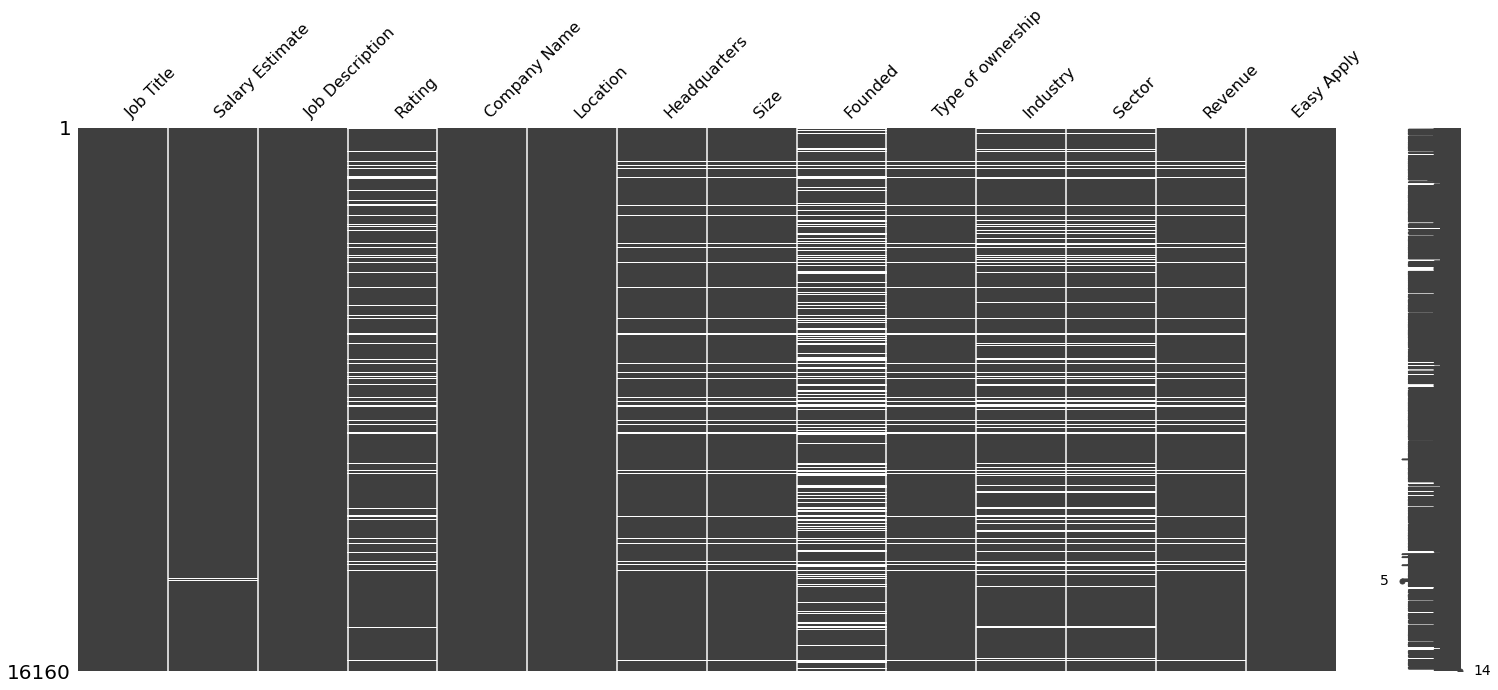

In [14]:
#visualize missing values as a matrix
msno.matrix(df)

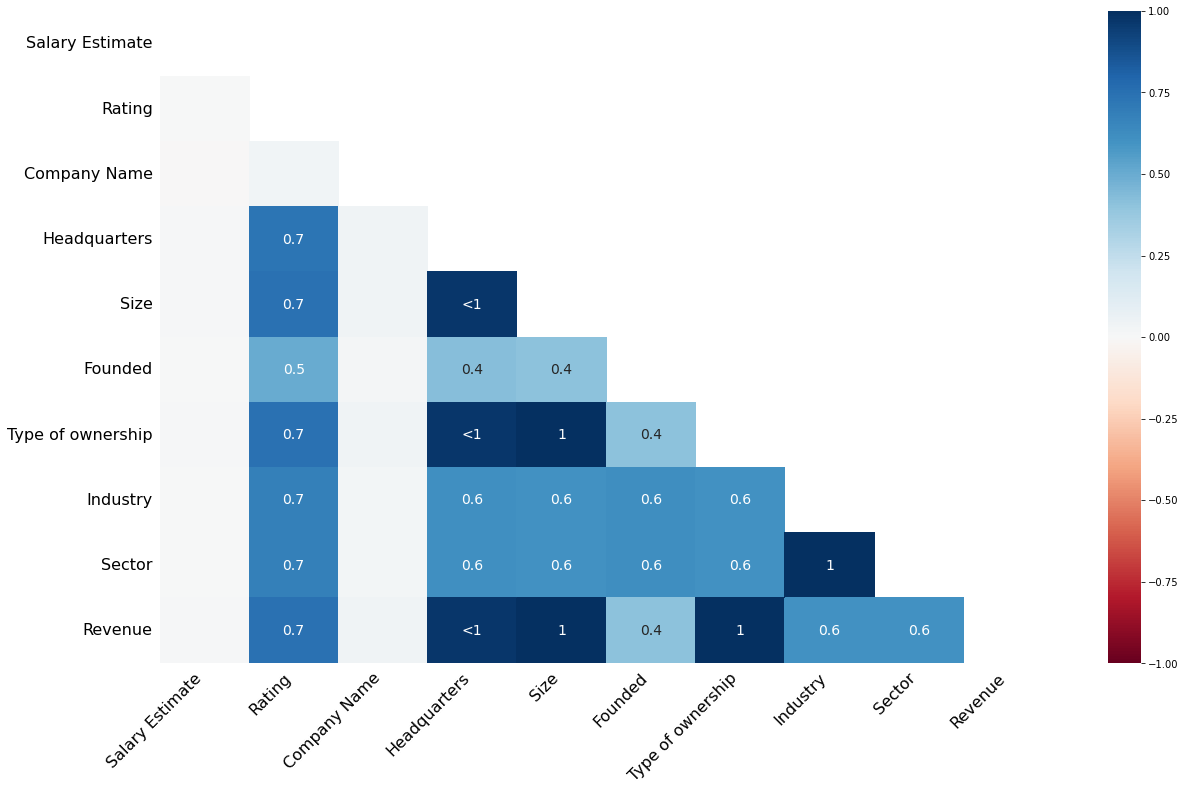

In [15]:
#heapmap for correlation analysis
msno.heatmap(df)

# Preparing & Cleaning Dataset

> Now, let's examine each column in our agenda one by one and make the necessary, required adjustment.

#### <a>We will start with `Company Name` column 

> We will drop out any row that has not a company name because I think it is a very important thing in confirming identity.

In [16]:
# to remove rows with empty cells
df.dropna(subset=['Company Name'], inplace=True)

In [17]:
# To make sure everything is working fine.
# just call this fun.
ratio_meth()

                   Total missing  % missing
Founded                     4247  26.284194
Industry                    2289  14.166357
Sector                      2286  14.147791
Rating                      1594   9.865082
Headquarters                 966   5.978463
Size                         922   5.706152
Type of ownership            922   5.706152
Revenue                      922   5.706152
Salary Estimate               46   0.284689
Job Title                      0   0.000000
Job Description                0   0.000000
Company Name                   0   0.000000
Location                       0   0.000000
Easy Apply                     0   0.000000


> Note: As we can see the `Company Name` column includes number, which most probably reflects, their rating score and this is proof of my observation.

In [18]:
# explore some rows with ['Company Name', 'Rating'] columns only.
df[['Company Name', 'Rating']].head(3)

,Company Name,Rating
0,Hopper\n3.5,3.5
1,Noom US\n4.5,4.5
2,Decode_M,NaN


> Let's remove rating part from the `company name`

In [19]:
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')
# To make sure everything is working fine.
df[['Company Name', 'Rating']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Company Name,Rating
0,Hopper,3.5
1,Noom US,4.5
2,Decode_M,NaN


> The virtualization for the `Company Name` column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


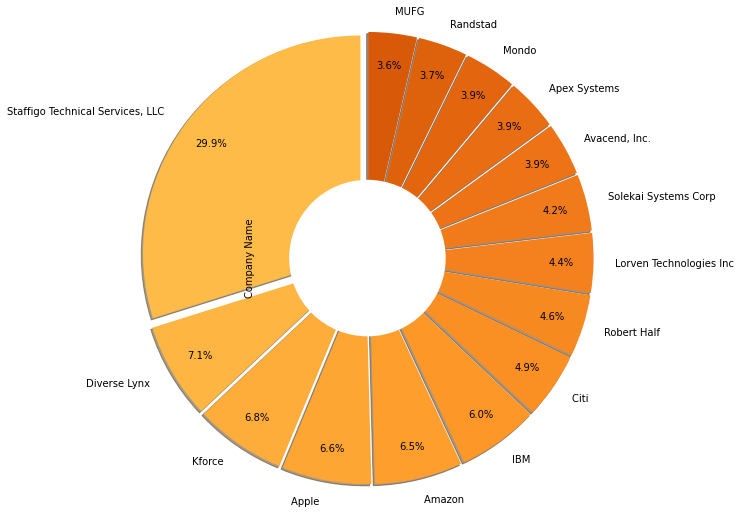

In [20]:
# source : https://matplotlib.org/stable/tutorials/colors/colormaps.html

# import matplotlib lib
import matplotlib.pyplot as plt

#colors
colors = plt.cm.YlOrBr(np.linspace(0.4,.7,15))
# # to get some colors
# print(plt.colormaps())

#explsion
mylist = []
for x in range(15):
    mylist.append(0.1)

explode = tuple(mylist)

# Pie chart
df['Company Name'].value_counts()[:15].plot.pie(radius = 2.5,shadow=True, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.9,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

> Top 15 most frequent companies in this column

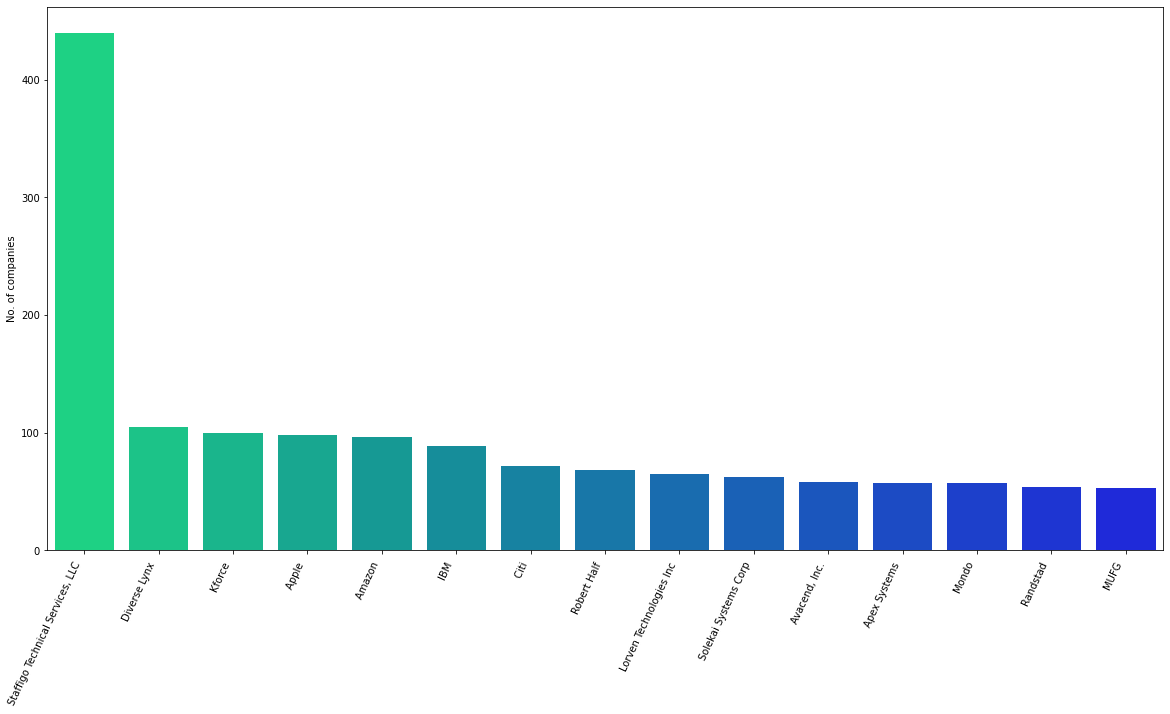

In [21]:
import seaborn as sns

plt.figure(figsize=(20,10))

var_ = df['Company Name'].value_counts().head(15)

chart = sns.barplot( data=df, x=var_.index, y=var_.values, palette='winter_r')

chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',)
chart.axes.yaxis.label.set_text("No. of companies")


> #### <a>The next column is `Job Title`

> 

> And also we need to separate the department name from job title column such as (`Data Scientist, Product Analytics`)

In [22]:
df['Job Title'].unique()

array(['Senior Data Scientist', 'Data Scientist, Product Analytics',
       'Data Science Manager', ..., 'F35 Software Engineer',
       'Software Engineer - AJ',
       'Future Opportunities: Software Development Engineer'],
      dtype=object)

In [23]:
department = df['Job Title'].str.split(',', expand = True)
df['Job Title'], df['Department'] = department[0],department[1]

In [24]:
# To make sure everything is working fine.
# just call this fun.
ratio_meth()

                   Total missing  % missing
Department                 14645  90.636217
Founded                     4247  26.284194
Industry                    2289  14.166357
Sector                      2286  14.147791
Rating                      1594   9.865082
Headquarters                 966   5.978463
Size                         922   5.706152
Type of ownership            922   5.706152
Revenue                      922   5.706152
Salary Estimate               46   0.284689
Job Title                      0   0.000000
Job Description                0   0.000000
Company Name                   0   0.000000
Location                       0   0.000000
Easy Apply                     0   0.000000


In [25]:
# but we will drop teh department column because it has too many missing values ~ 90%
df.drop('Department',1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [26]:
# To make sure everything is working fine.
df['Job Title'].value_counts().head(20)

Data Analyst                     1495
Data Engineer                     758
Business Analyst                  565
Data Scientist                    343
Senior Data Analyst               276
Business Systems Analyst          149
Senior Data Engineer              141
Big Data Engineer                 117
Software Engineer                 113
Junior Data Analyst               109
Senior Data Scientist             104
Business Intelligence Analyst      91
Business Data Analyst              83
Sr. Data Analyst                   77
Senior Business Analyst            77
Machine Learning Engineer          69
Data Analyst Junior                63
Analyst                            60
Data Analyst â Junior              54
Data Analyst II                    49
Name: Job Title, dtype: int64

> But as we can see there are some special characters and also some special word that need to handle it. 

In [27]:
# remove special characters and unify some word use
df['Job Title']= df['Job Title'].str.upper().replace('[^A-Za-z0-9]+', ' ',regex=True)

In [28]:
# unify some special word
l1 = ['Â','AND ','WITH ','SYSTEMS','OPERATIONS','ANALYTICS','SERVICES','ENGINEERS','NETWORKS','GAMES','MUSICS','INSIGHTS','SOLUTIONS','JR ','MARKETS','STANDARDS','FINANCE','PRODUCTS','DEVELOPERS','SR ',' 2']
l2 = ['','','','SYSTEM','OPERATION','ANALYTIC','SERVICE','ENGINEER','NETWORK','GAME','MUSIC','INSIGHT','SOLUTION','JUNIOR ','MARKET','STANDARD','FINANCIAL','PRODUCT','DEVELOPER','SENIOR ',' II']

df['Job Title']= df['Job Title'].str.upper().replace(l1,l2,regex=True)

In [29]:
# To make sure everything is working fine.
df['Job Title'].value_counts().head(20)

DATA ANALYST                     1520
DATA ENGINEER                     772
BUSINESS ANALYST                  574
SENIOR DATA ANALYST               388
DATA SCIENTIST                    345
SENIOR DATA ENGINEER              199
BUSINESS SYSTEM ANALYST           187
SENIOR DATA SCIENTIST             143
SENIOR BUSINESS ANALYST           128
BIG DATA ENGINEER                 123
DATA ANALYST JUNIOR               120
JUNIOR DATA ANALYST               119
SOFTWARE ENGINEER                 115
BUSINESS DATA ANALYST             109
BUSINESS INTELLIGENCE ANALYST      93
MACHINE LEARNING ENGINEER          69
ANALYST                            61
DATA ANALYST II                    53
SENIOR ANALYST                     50
DATA QUALITY ANALYST               48
Name: Job Title, dtype: int64

In [30]:
# unify some special word

l1 = ['BUSINESS INTELLIGENCE','INFORMATION TECHNOLOGY','QUALITY ASSURANCE','USER EXPERIENCE','USER INTERFACE','DATA WAREHOUSE','DATA ANALYST','DATA BASE','DATA QUALITY','DATA GOVERNANCE','BUSINESS ANALYST','DATA MANAGEMENT','REPORTING ANALYST','BUSINESS DATA','SYSTEM ANALYST','DATA REPORTING','QUALITY ANALYST','DATA ENGINEER','BIG DATA','SOFTWARE ENGINEER','MACHINE LEARNING','FULL STACK','DATA SCIENTIST','DATA SCIENCE','DATA CENTER','ENTRY LEVEL','NEURAL NETWORK','SYSTEM ENGINEER',' ML ']
l2 = ['BI','IT','QA','UX','UI','DATA_WAREHOUSE','DATA_ANALYST','DATABASE','DATA_QUALITY','DATA_GOVERNANCE','BUSINESS_ANALYST','DATA_MANAGEMENT','REPORTING_ANALYST','BUSINESS_DATA','SYSTEM_ANALYST','DATA_REPORTING','QUALITY_ANALYST','DATA_ENGINEER','BIG_DATA','SOFTWARE_ENGINEER','MACHINE_LEARNING','FULL_STACK','DATA_SCIENTIST','DATA_SCIENCE','DATA_CENTER','ENTRY_LEVEL','NEURAL_NETWORK','SYSTEM_ENGINEER',' MACHINE_LEARNING ']
df['Job Title']= df['Job Title'].replace(l1, l2, regex=True)

In [31]:
# unify some special word

l1 = ['DATA_ENGINEER JUNIOR','DATA_ENGINEER SENIOR','DATA  REPORTING_ANALYST','DATA ','BIG_DATA ']
l2 = ['JUNIOR DATA_ENGINEER','SENIOR DATA_ENGINEER','DATA_REPORTING_ANALYST','DATA_','BIG_DATA_']
df['Job Title']= df['Job Title'].replace(l1, l2, regex=True)

> As we can see some of the naming in the job title can be renamed like: 

>*  `[ 'DATA ANALYST - SENIOR', 'DATA ANALYST, SENIOR' ,'SR. DATA ANALYST', 'SR DATA ANALYST', 'DATA ANALYST SENIOR']` = `SENIOR DATA ANALYST` 
* `['SR. SCIENTIST', 'SR SCIENTIST']` = `SENIOR SCIENTIST` 
* `['DATA ANALYST JUNIOR', 'DATA ANALYST (JUNIOR)', 'DATA ANALYST - JUNIOR', 'JR DATA ANALYST', 'JR. DATA ANALYST']` = `JUNIOR DATA ANALYST`

In [32]:
# to replace [ 'DATA ANALYST - SENIOR', 'DATA ANALYST, SENIOR' ,'SR. DATA ANALYST', 'SR DATA ANALYST', 'DATA ANALYST SENIOR'] with 'SENIOR DATA ANALYST'
l1 = [ 'DATA ANALYST - SENIOR', 'DATA ANALYST, SENIOR' ,'SR. DATA ANALYST', 'SR DATA ANALYST', 'DATA ANALYST SENIOR']
df['Job Title'].replace(l1,'SENIOR DATA ANALYST', inplace = True)


# to replace ['SR. SCIENTIST', 'SR SCIENTIST'] with 'SENIOR SCIENTIST'
df['Job Title'].replace(['SR. SCIENTIST', 'SR SCIENTIST'],'SENIOR SCIENTIST', inplace = True)

# to replace ['DATA ANALYST JUNIOR', 'DATA ANALYST (JUNIOR)', 'DATA ANALYST - JUNIOR', 'JR DATA ANALYST', 'JR. DATA ANALYST'] with 'JUNIOR DATA ANALYST'
l1 = ['DATA ANALYST JUNIOR', 'DATA ANALYST (JUNIOR)', 'DATA ANALYST - JUNIOR', 'JR DATA ANALYST', 'JR. DATA ANALYST']
df['Job Title'].replace(l1,'JUNIOR DATA ANALYST', inplace = True)

In [33]:
# To make sure everything is working fine.
df['Job Title'].value_counts().head(20)

DATA_ANALYST                 1520
DATA_ENGINEER                 772
BUSINESS_ANALYST              574
SENIOR DATA_ANALYST           388
DATA_SCIENTIST                345
SENIOR DATA_ENGINEER          199
BUSINESS SYSTEM_ANALYST       187
SENIOR DATA_SCIENTIST         143
SENIOR BUSINESS_ANALYST       128
BIG_DATA_ENGINEER             123
DATA_ANALYST JUNIOR           120
JUNIOR DATA_ANALYST           119
SOFTWARE_ENGINEER             115
BUSINESS_DATA_ANALYST         109
BI ANALYST                    100
MACHINE_LEARNING ENGINEER      69
ANALYST                        61
DATA_ANALYST II                53
SENIOR ANALYST                 50
DATA_QUALITY_ANALYST           48
Name: Job Title, dtype: int64

> Now let’s start making our Pie chart for the first 6 highest values int the `Job Title` column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


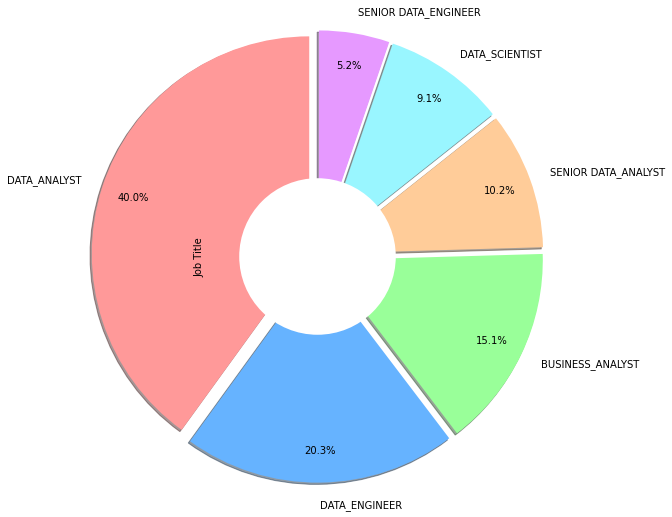

In [34]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#99f6ff','#e699ff']
# colors = plt.cm.Blues(np.linspace(0.4,.7,6))
# # to get some colors
# print(plt.colormaps())

#explsion
mylist = []
for x in range(6):
    mylist.append(0.1)

explode = tuple(mylist)

# Pie chart
df['Job Title'].value_counts()[:6].plot.pie(radius = 2.5,shadow=True, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.9,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

> #### <a>The next column is (`Salary Estimate`)

In [35]:
df['Salary Estimate'].unique()[:30]

array(['$111K-$181K (Glassdoor est.)', '$120K-$140K (Glassdoor est.)',
       '$119K-$147K (Glassdoor est.)', '$74K-$124K (Glassdoor est.)',
       '$102K-$121K (Glassdoor est.)', '$129K-$210K (Glassdoor est.)',
       '$156K-$254K (Glassdoor est.)', '$116K-$152K (Glassdoor est.)',
       '$133K-$171K (Glassdoor est.)', '$110K-$139K (Glassdoor est.)',
       '$82K-$141K (Glassdoor est.)', '$96K-$119K (Glassdoor est.)',
       '$146K-$175K (Glassdoor est.)', '$102K-$164K (Glassdoor est.)',
       '$113K-$180K (Glassdoor est.)', '$76K-$122K (Glassdoor est.)',
       '$134K-$218K (Glassdoor est.)', '$76K-$125K (Glassdoor est.)',
       '$132K-$208K (Glassdoor est.)', '$83K-$105K (Glassdoor est.)',
       '$75K-$143K (Glassdoor est.)', '$34K-$72K (Glassdoor est.)',
       '$37K-$75K (Glassdoor est.)', '$113K-$184K (Glassdoor est.)',
       '$136K-$164K (Glassdoor est.)', '$34-$53 Per Hour(Glassdoor est.)',
       '$46K-$80K (Glassdoor est.)', '$79K-$130K (Glassdoor est.)',
       '$91K-$10

> **Notes on the previous cell** : 

> The type of the `Salary Estimate` column is `object`. In its current form, it is not possible to perform mathematical operations that make use of the numerical values in the column values. Therefore, create columns `salary_estimate_upper_bound`, `salary_estimate_lower_bound` and `salary_average` with float type using column values `(ex $111K-$181K)` from column `Salary Estimate`.

> **Hint:** `($111K-$181K)` --> for `salary_estimate_lower_bound` take the first number, for `salary_estimate_upper_bound` take the second number, for `salary_average` get the sum of first and second numbers and divide by 2.

> Note : we need also to convert the hourly salary into annual salary like : `$34-$53 Per Hour(Glassdoor est.)`

In [36]:
hours_per_week = 40 # no. of hours per week
weeks_per_year = 52 # no. of weeks per year

for i in range(df.shape[0]):
    if i == 9861 or i == 13009: # we don't have [9861 ,13009] index
      i = i + 1
    
    # print('i : ',i)
    salary_estimate = str(df.loc[i,"Salary Estimate"])
    # print(salary_estimate)
    if salary_estimate != str(np.nan):
      salary_estimate = salary_estimate.replace("$", "")
      
      # hourly salary
      if "Per Hour" in salary_estimate:
          lower, upper = salary_estimate.split("-")
          upper, _ = upper.split("Per")
          upper= upper.strip()
          lower = int(lower) *hours_per_week*weeks_per_year*(1/1000)
          upper = int(upper) *hours_per_week*weeks_per_year*(1/1000)
          
      # annual salary
      else:
          lower, upper = salary_estimate.split("-")
          lower = lower.replace("K", "")
          upper, _= upper.split("(")
          upper=upper.replace("K", "")
          upper = upper.strip()
      
          
      lower = int(lower)
      upper = int(upper)
      df.loc[i,"salary_estimate_lower_bound"] = lower
      df.loc[i,"salary_estimate_upper_bound"] = upper

    else:
      df.loc[i,"salary_estimate_lower_bound"] = np.nan
      df.loc[i,"salary_estimate_upper_bound"] = np.nan


> As we can see there are `48` empty values in `salary_estimate_lower_bound & salary_estimate_upper_bound`

> So, we need to handle both of these columns with `Iterative Imputer` class .


In [37]:
df['salary_estimate_lower_bound'].isnull().sum()

48

In [38]:
df['salary_estimate_upper_bound'].isnull().sum()

48

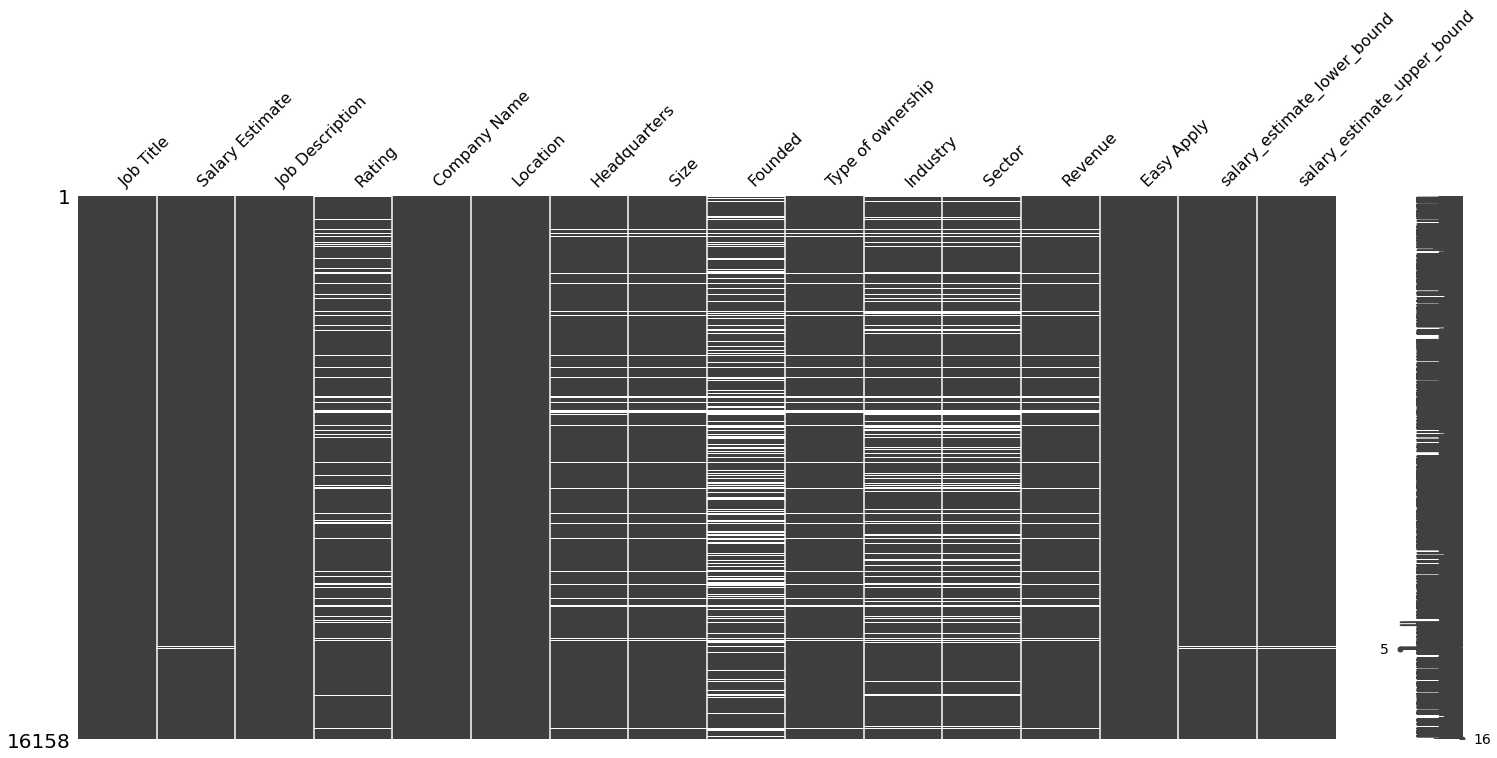

In [39]:
#visualize missing values as a matrix
msno.matrix(df)

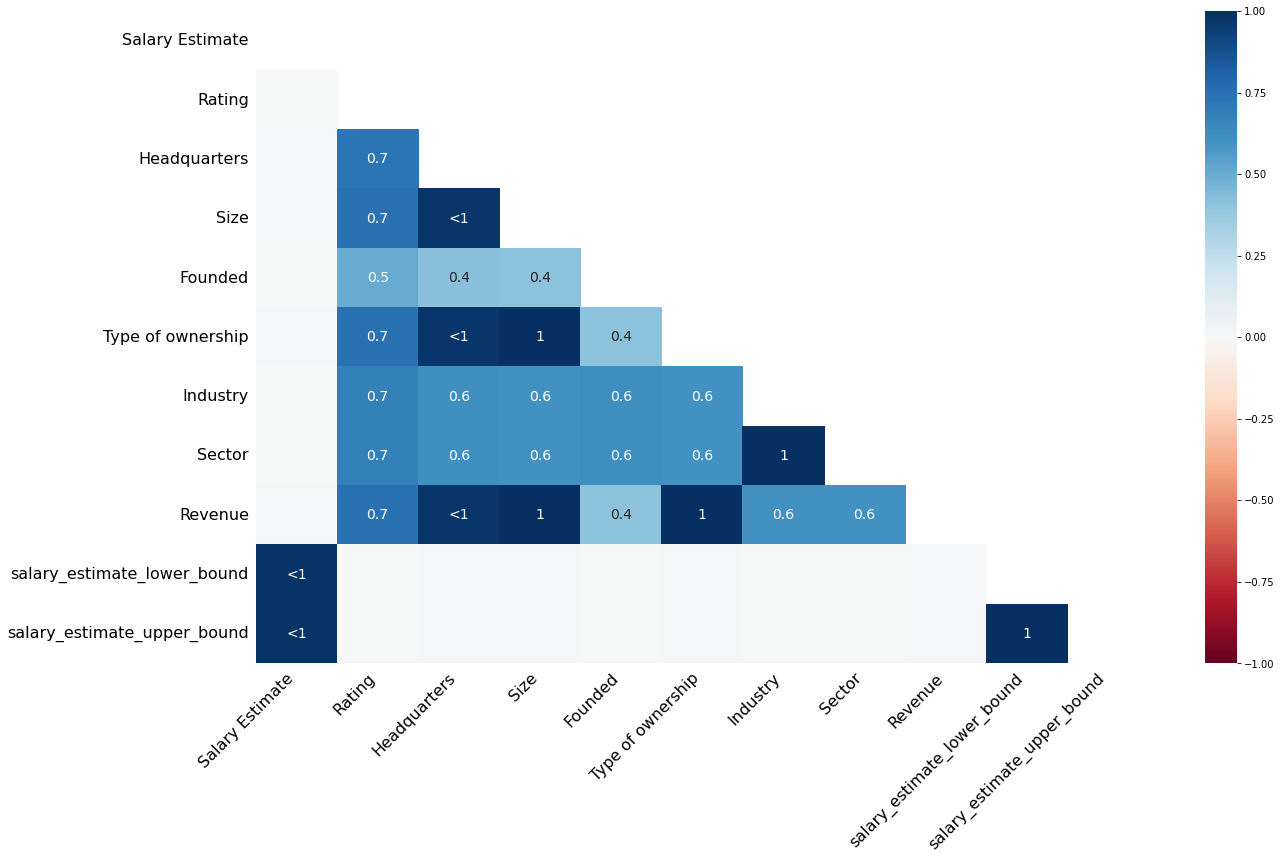

In [40]:
#heapmap for correlation analysis
msno.heatmap(df)

In [41]:
# explore some of these rows
df[df['salary_estimate_lower_bound'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound
10150,CONFIGURATION DATA_MANAGEMENT ANALYST III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),0,NaN,NaN
12680,SAP DATA_ANALYST,NaN,"Title SAP Data Analyst Location Wichita, KS Le...",5.0,Global Soft Systems,"Wichita, KS","Overland Park, KS",1 to 50 employees,NaN,Company - Private,Consulting,Business Services,$1 to $5 million (USD),0,NaN,NaN
12681,DATA_SCIENTIST DATA_ANALYST,NaN,"WHO WE ARE: Net Pay Advance, Inc. is a financi...",5.0,Net Pay Advance Inc,"Wichita, KS","Wichita, KS",1 to 50 employees,2007.0,Company - Private,Lending,Finance,$5 to $10 million (USD),0,NaN,NaN
12682,MASTER DATA_MANAGEMENT ANALYST,NaN,Challengers Wanted.\nSee how we're embracing t...,NaN,"Koch Companies Services, LLC","Wichita, KS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12767,JUNIOR DATA_ANALYST,NaN,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),0,NaN,NaN
12768,CLIMATE DATA_ANALYST,NaN,Job Description\nClimate Data Analyst\n\nLexin...,3.8,On Time Talent Solutions,"Lexington-Fayette, KY","Golden Valley, MN",1 to 50 employees,2015.0,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,0,NaN,NaN
12769,DATA_ANALYST,NaN,Job Description\nJob description\n\n• Interpre...,5.0,"Staffigo Technical Services, LLC","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),0,NaN,NaN
12770,DATA_CONVERSION ANALYST,NaN,"About us\n\nBitwerx, Inc. is a team of industr...",NaN,"Bitwerx, Inc.","Lexington-Fayette, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12771,DATA_ANALYST JUNIOR,NaN,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC","Lexington-Fayette, KY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),0,NaN,NaN
13408,P C DATA_ANALYTIC ANALYST PR,NaN,P&C Data Analytics Analyst opening in Pennsylv...,NaN,Pryor Associates,United States,"Hicksville, NY",1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,0,NaN,NaN


> Now we don't need `Salary Estimate` column. So, we will drop it.

In [42]:
# Drop specified labels from columns
df.drop(['Salary Estimate'], axis = 1, inplace = True) 

In [43]:
# source : https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
# source : https://amueller.github.io/aml/01-ml-workflow/08-imputation.html
# source : https://stackoverflow.com/questions/57154209/implementation-of-sklearn-impute-iterativeimputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# create a list with columns names .
col_names = ['salary_estimate_lower_bound', 'salary_estimate_upper_bound']

# Use IterativeImputer to predict missing values.
imputer = IterativeImputer(max_iter=10)
# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

# create salary average column.
df['salary_average'] = (df['salary_estimate_lower_bound'] + df['salary_estimate_upper_bound']) / 2

In [44]:
# To make sure everything is working fine.
df[12670:12683]

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,salary_average
12671,ACCOUNTING DATA_ANALYST ASSOCIATE,Job Title *\nAccounting/Data Analyst Associate...,3.7,Bloomfield Homes,"Southlake, TX","Southlake, TX",1 to 50 employees,NaN,Subsidiary or Business Segment,Construction,"Construction, Repair & Maintenance",$100 to $500 million (USD),0,44.000000,79.00000,61.500000
12672,SQL DATA_ANALYST,A global leader in financial services technolo...,3.6,On Call Staffing,"Dallas, TX","San Diego, CA",51 to 200 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$5 to $10 million (USD),0,51.000000,92.00000,71.500000
12673,E COMMERCE DATA_ANALYST,We have an exciting opportunity forYOU to join...,3.4,iSeatz,"New Orleans, LA","New Orleans, LA",51 to 200 employees,1999.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,52.000000,82.00000,67.000000
12674,DATA_ANALYST,Job Description\nHireWorks/Ridgeback Solutions...,NaN,"HireWorks, LLC","New Orleans, LA","Irving, TX (US), TX",1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,0,52.000000,82.00000,67.000000
12675,STATISTICAL FORECAST DATA_ANALYST TABLEAU REQU...,Statistical ForecastData Analyst ndash Tableau...,NaN,"Technology Recruiting Solutions,Inc.","New Orleans, LA",NaN,1 to 50 employees,2011.0,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,0,52.000000,82.00000,67.000000
12676,DATA_ANALYST,DescriptionNew Orleans Accountemps has a 3-6 m...,3.5,Robert Half,"New Orleans, LA","Menlo Park, CA",10000+ employees,1948.0,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),0,52.000000,82.00000,67.000000
12677,DATA_ANALYST,Data Analyst gathers and analyzes healthcare d...,NaN,ASCENSION DEPAUL SERVICES,"New Orleans, LA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,52.000000,82.00000,67.000000
12678,DIVESTITURE DATA_GOVERNANCE ANALYST,Job Description\nMust have :\nExperience in ge...,4.0,Lorven Technologies Inc,"New Orleans, LA","Plainsboro, NJ",1 to 50 employees,NaN,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),0,52.000000,82.00000,67.000000
12679,DATA_ANALYTIC DIGITAL MARKETING ANALYST,Data Analytics/Digital Marketing Analyst\n\nAb...,NaN,Exceptional Lives https://exceptionallives.org,"New Orleans, LA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,52.000000,82.00000,67.000000
12680,SAP DATA_ANALYST,"Title SAP Data Analyst Location Wichita, KS Le...",5.0,Global Soft Systems,"Wichita, KS","Overland Park, KS",1 to 50 employees,NaN,Company - Private,Consulting,Business Services,$1 to $5 million (USD),0,64.795407,108.33383,86.564618


> # <a>Question (1.1) 

> * Propose two questions (non-predictive) that you believe are interesting toexplore and can be answered using the provided dataset (at least one question should
be answered using hypothesis test). 

> * Briefly describe why you think those questions are
interesting to whom. You can answer this question in a markdown cell of your ipynb file.


> # <a> Question (3) 

> For the two questions you proposed in the first subquestion, what are the null
hypothesis and alternative hypothesis? Perform statistical test to answer your question
and report your findings.


> **Hypothesis :** We will assume that the greater number of jobs available in a particular field will lead to higher salaries in that field

> ## <a> Q 1) Does the greater number of available jobs lead to higher salaries in its field ?

> **Ans:** No, because the number of jobs available in the field of `Data Analyst` is `1520` and the minimum and maximum salary in this field are `80` and `69` thousand.

> On the other hand, the number of jobs available in the field of `Data Engineer` is `772`, and the minimum and maximum salary in this field is `106` and `104` thousand.

> The importance of this question will be for people who are looking for jobs with higher salaries. When the data is not analyzed, they will think that the largest demand for employment from companies will be with the highest salary than other fields.

In [45]:
len(df[df['Job Title']=='DATA_ANALYST'])

1520

In [46]:
len(df[df['Job Title']=='DATA_ENGINEER']['salary_average'])

772

> #### <a> Data Science Job Salary Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

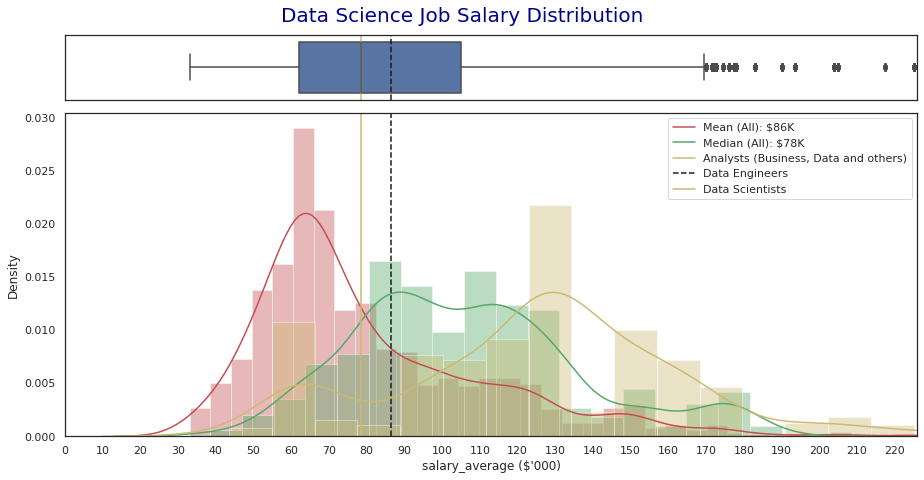

In [47]:
das = df[df['Job Title']=='DATA_ANALYST']['salary_average']
des = df[df['Job Title']=='DATA_ENGINEER']['salary_average']
oas = df[df['Job Title']=='BUSINESS_ANALYST']['salary_average']
bas = df[df['Job Title']=='SENIOR DATA_ANALYST ']['salary_average']
dss = df[df['Job Title']=='DATA_SCIENTIST']['salary_average']

as_ = pd.concat([das,oas,bas])

sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,7))
mean=df['salary_average'].mean()
median=df['salary_average'].median()

bph = sns.boxplot(df['salary_average'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

as_1 = sns.distplot(as_,ax=ax_hist, color="r").set(xlabel="salary_average ($'000)")
des1 = sns.distplot(des,ax=ax_hist, color="g").set(xlabel="salary_average ($'000)")
dss1 = sns.distplot(dss,ax=ax_hist, color="y").set(xlabel="salary_average ($'000)")

ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean (All): $'+str(int(mean))+'K':mean,'Median (All): $'+str(int(median))+'K':median,
            'Analysts (Business, Data and others)':as_,'Data Engineers':des,'Data Scientists':dss})
plt.xlim(0,226)
plt.xticks(np.arange(0,226,step=10))
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Adjust the padding between and around subplots
plt.suptitle('Data Science Job Salary Distribution', fontsize=20,color='darkblue')
plt.show()

> **Notes on the previous cell** : 

> The avg. salary of all data science jobs is about `$86K`, and the median is around `$78K`. We can see distinguished salary distributions among Data Analysts (Red, Lower), Data Engineers (Green, Middle) and Data Scientists (Yellow, Higher).

> #### <a> We need to identify the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


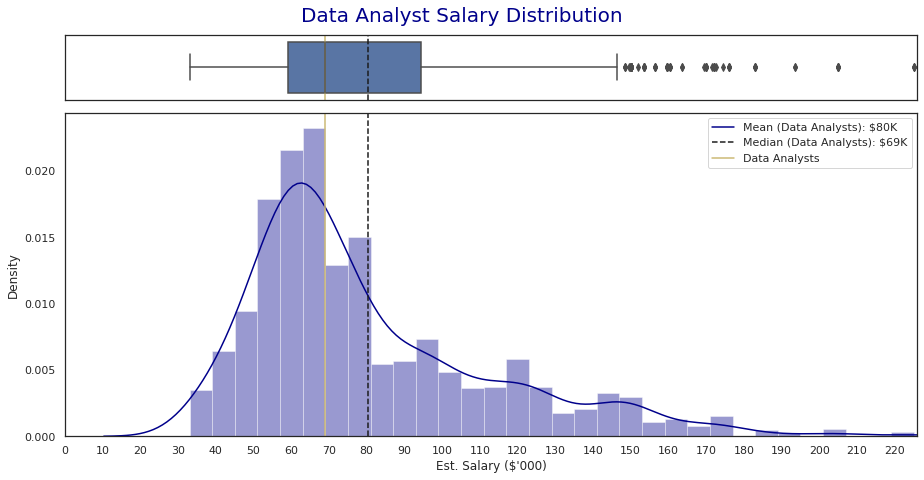

In [48]:
def distribution_fun(title_, job_title_, job_title_var, color_):
  sns.set(style='white')

  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,7))
  mean=job_title_var.mean()
  median=job_title_var.median()

  bph = sns.boxplot(job_title_var, ax=ax_box).set(xlabel="")
  ax_box.axvline(mean, color='k', linestyle='--')
  ax_box.axvline(median, color='y', linestyle='-')

  das1 = sns.distplot(job_title_var,ax=ax_hist, color=color_).set(xlabel="Est. Salary ($'000)")
  ax_hist.axvline(mean, color='k', linestyle='--')
  ax_hist.axvline(median, color='y', linestyle='-')

  plt.legend({'Mean ('+job_title_+'): $'+str(int(mean))+'K':mean, 'Median ('+job_title_+'): $'+str(int(median))+'K':median,''+job_title_:job_title_var})
  plt.xlim(0,226)
  plt.xticks(np.arange(0,226,step=10))
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Adjust the padding between and around subplots
  plt.suptitle(title_, fontsize=20,color= 'darkblue')
  plt.show()

# call the fun. to show the Distribution for Data Analyst Salary
distribution_fun('Data Analyst Salary Distribution','Data Analysts',das,'darkblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


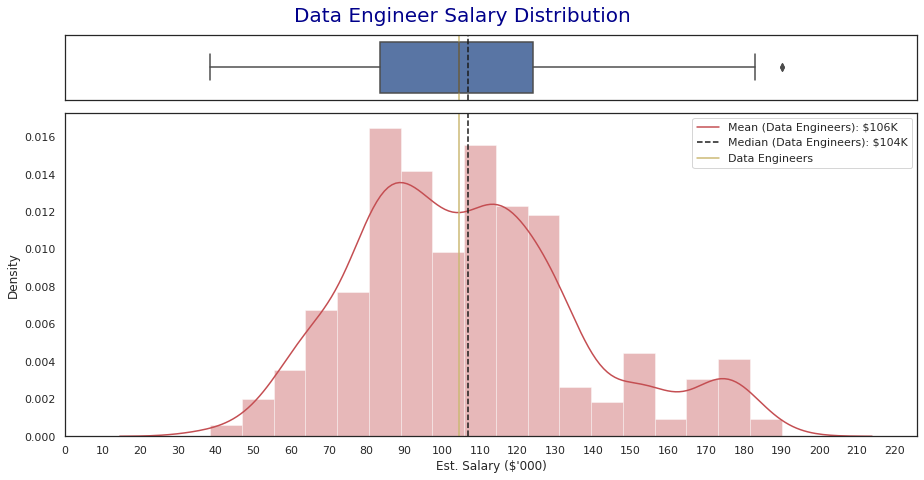

In [49]:
# call the fun. to show the Distribution for Data Engineer Salary
distribution_fun('Data Engineer Salary Distribution','Data Engineers',des,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


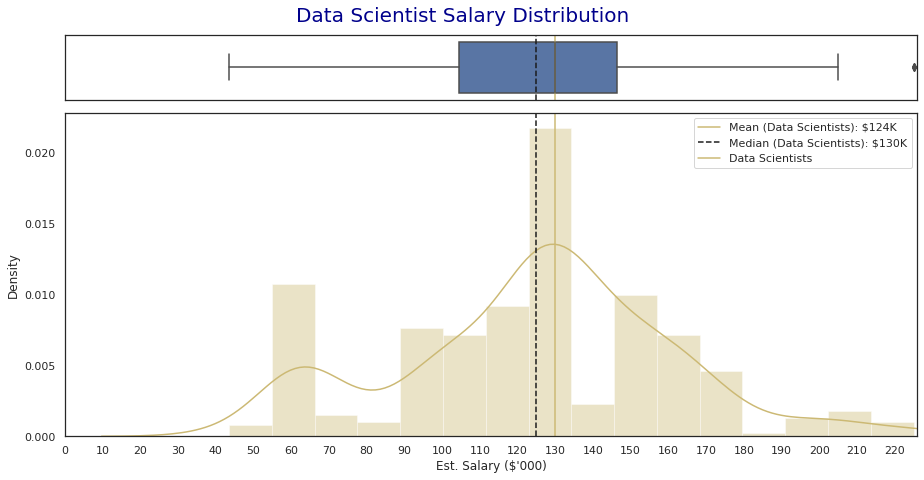

In [50]:
# call the fun. to show the Distribution for Data Scientist Salary
distribution_fun('Data Scientist Salary Distribution','Data Scientists',dss,'y')

> #### Interquartile Range IQR

>The IQR method is used to highlight outliers in the boxplot. We can use it to find outliers in the dataset.  

> It makes sense to use the interquartile range (IQR) to spot outliers. The IQR is the range of values between the first and third quartiles, i.e., 25th and 75th percentiles, so it will include the majority of the data points in the dataset.

>![](https://miro.medium.com/max/1400/1*RkaxqWyt6FuG2nBI71iGkg.jpeg)

> Any data point lower than the lower bound or greater than the upper bound is an outlier:


> * (data point value) < Q1–1.5xIQR, then it’s an outlier.
   * Min, minimum value in the dataset excluding outliers

>* (data point value) > Q3 + 1.5xIQR, then it’s an outlier.
  * Max, maximum value in the dataset, excluding outliers

[source](https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


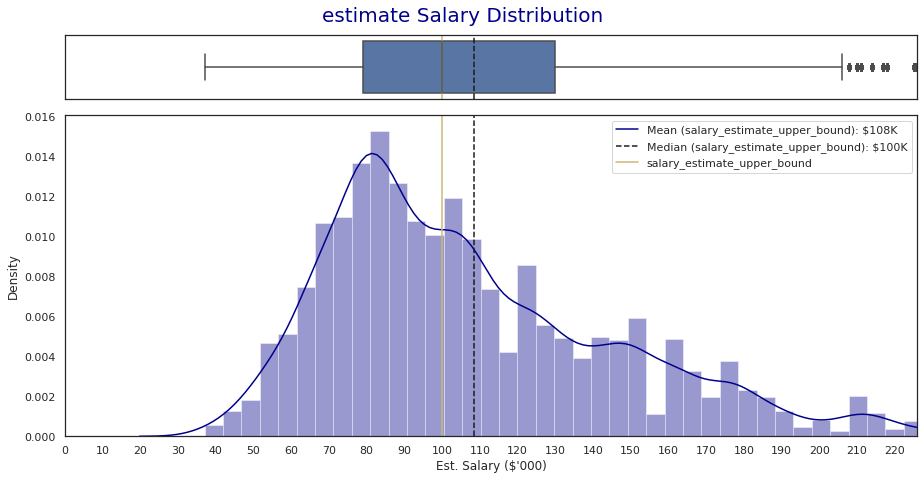

In [51]:
# call the fun. to show the Distribution for estimate Salary
distribution_fun('estimate Salary Distribution','salary_estimate_upper_bound',df['salary_estimate_upper_bound'],'darkblue')

> ## <a> When to drop or keep outliers?

> I believe that the dropping outlier is always a harsh step and should be taken only in extreme conditions when we’re very sure that the outlier is due to a measurement error, which we generally do not know while doing analysis.

> Sometimes outliers indicate a mistake in data collection. Other times, though, they can influence a data set, so it’s important to keep them to better understand the dataset in the big picture.

> #### But let's try to remove the outliers from `salary_estimate_upper_bound` column . And also You can do this in other columns too.

In [52]:
# calculate Q1 and Q3
Q1 = df['salary_estimate_upper_bound'].quantile(0.25)
Q3 = df['salary_estimate_upper_bound'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

In [53]:
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

df[ df['salary_estimate_upper_bound'] > (Q3+1.5*IQR)]
df[ df['salary_estimate_upper_bound'] < (Q1-1.5*IQR)]

df = df[ df['salary_estimate_upper_bound'] < (Q3+1.5*IQR)]
df.shape

206.5
2.5


(15693, 16)

> As we can see , we get a new distribution of our variable with a new IQR. With the new IQR other values can be outliers that were not outliers with the IQR of the original variable (and therefore are not removed). Thus, you need to rerun the previous two cells again and again as long as there are outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


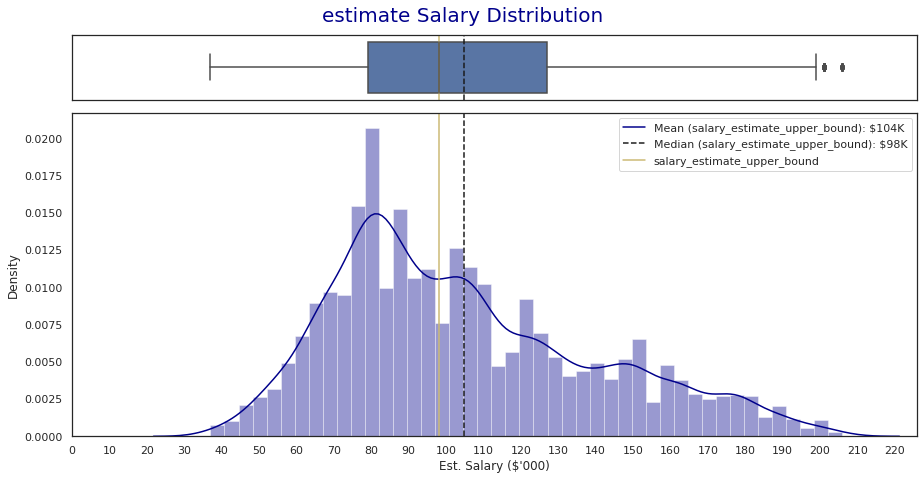

In [54]:
# call the fun. to show the Distribution for estimate Salary
distribution_fun('estimate Salary Distribution','salary_estimate_upper_bound',df['salary_estimate_upper_bound'],'darkblue')

> #### <a>The next column is (`Job Description`)


In [55]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pylab

stopWords = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

def get_wordcloud(series): #simple function to tokenize and plot a said column
    word_cloud = ''
    
    for job in series:
        tokens = tokenizer.tokenize(job)
        for token in tokens:
            if token not in stopWords:
                word_cloud += ''.join(token) + ' '

    wordcloud = WordCloud(width=800, height=500,margin=0,max_words=300, colormap='Set1').generate(word_cloud) 
    pylab.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

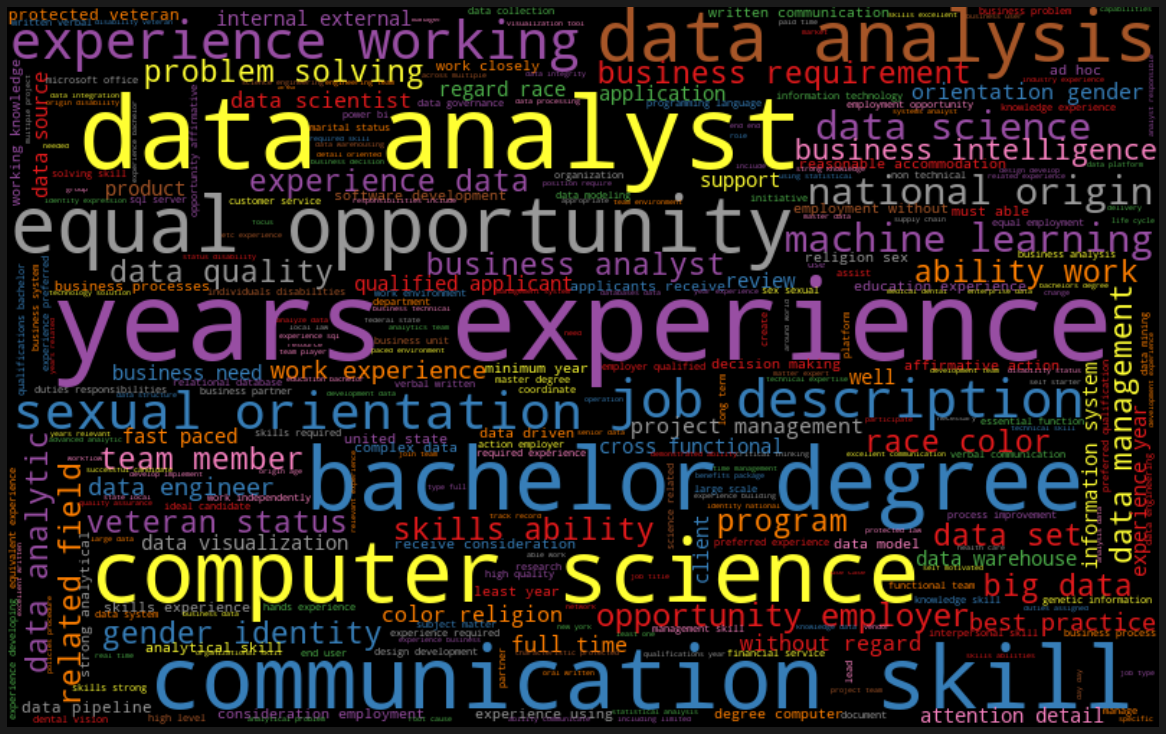

In [57]:
job_descrip = df['Job Description'].apply(lambda x: x.lower())
get_wordcloud(job_descrip)

In [58]:
df['Job Description'][2022]

"Overview Guidehouse is a leading management consulting firm serving the public and commercial markets. We guide our clients forward towards new futures that build trust in society and your professional skills along the journey. Join us at Guidehouse. Responsibilities The Data Engineer will need to demonstrate experience and knowledge of Activity Management, Requirement Identification, and Project Programming Programs or cross-Directorate programs which are still under development and need support to meet the end-state. Develop life-cycle sustainment and risk mitigation strategy recommendations for two FYDP's for each portfolio. Analyze built infrastructure data, aggregate requirements, assesses asset performance predictions from SMS, analyze statistics and trend across portfolios, validate data, perform data management, compile other summarizing reports for each AMP portfolio, and recommend enhancements to processes. Support AMP Enterprise Managers with the development of portfolio-sp

In [59]:
#Checking for null values for 'Job Description'columns
df['Job Description'].isnull().sum()

0

> From the above job descriptions, even though there are similarities in the job description, it has no missing values .

> #### <a>The next column is (`Rating`)


In [60]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Rating                                1556   9.915249
Headquarters                           942   6.002676
Size                                   899   5.728669
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Job Title                                0   0.000000
Job Description                          0   0.000000
Company Name                             0   0.000000
Location                                 0   0.000000
Easy Apply                               0   0.000000
salary_estimate_lower_bound              0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_average                           0   0.000000


> **Notes on the previous cell** : 

> As we can see, there are `1556` missing values which need to be handled

> <a>Note:

> Note: We can't populate the rating column with `mean` or any other simpleimputer because if there is no rating for this company, it means the rating is `zero`, I think this company is still new in the classdoor platform

In [61]:
# fill nan values with zero.
df['Rating'] = df['Rating'].fillna(0)

In [62]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Headquarters                           942   6.002676
Size                                   899   5.728669
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Job Title                                0   0.000000
Job Description                          0   0.000000
Rating                                   0   0.000000
Company Name                             0   0.000000
Location                                 0   0.000000
Easy Apply                               0   0.000000
salary_estimate_lower_bound              0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_average                           0   0.000000


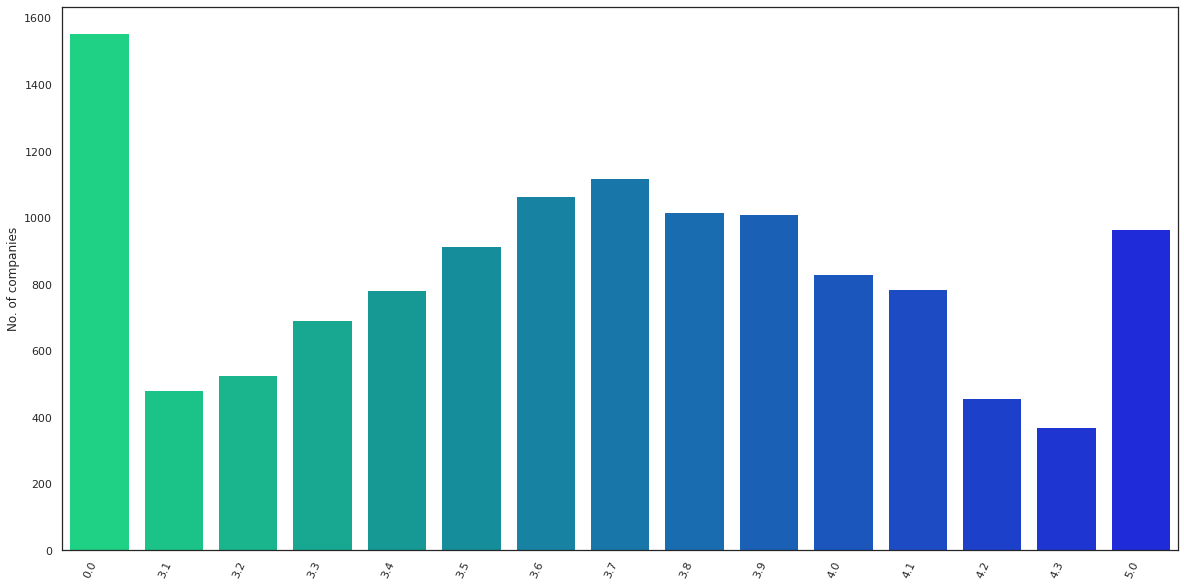

In [63]:
plt.figure(figsize=(20,10))

var_ = df['Rating'].value_counts().head(15)

chart = sns.barplot( data=df, x=var_.index, y=var_.values, palette='winter_r')

chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',)
chart.axes.yaxis.label.set_text("No. of companies")

> **Notes on the previous cell** : 

> As we can see the No. of companies with zero rating are more than `1500` companies.

> #### <a>The next column is (`Location`)

> Let's see if there is any relationship between job position and salary

> we will check that for the first `30` values

> Note : As we know the `location` column has no missing values


In [64]:
# groupby the locaiton and  the salary_estimate_lower_bound & salary_estimate_upper_bound
locationVSsalary = df.groupby('Location')[['salary_estimate_upper_bound','salary_estimate_lower_bound']].mean().sort_values(['salary_estimate_upper_bound','salary_estimate_lower_bound'],ascending=False)[:30]

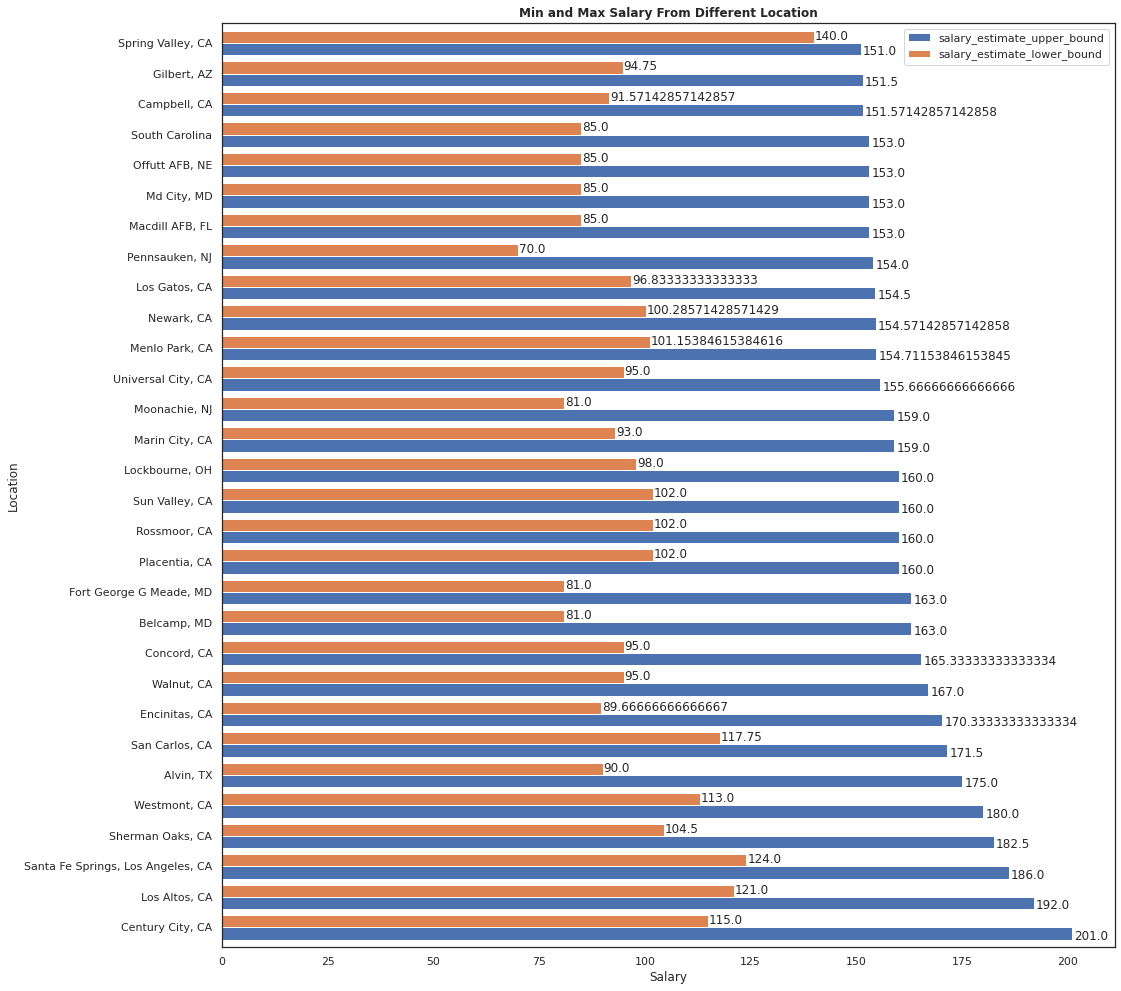

In [65]:
locationVSsalary.plot(kind="barh", figsize=(16,17), width=0.8)
plt.ylabel("Location")
plt.xlabel("Salary")
plt.title("Min and Max Salary From Different Location", fontweight="bold")

for index, value in enumerate(locationVSsalary["salary_estimate_upper_bound"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(locationVSsalary["salary_estimate_lower_bound"]):
    plt.text(value + 0.2, index + 0.1, str(value))

> #### <a>The next column is (`HeadQuarters`)


> As we can see there are `942` missing values in `HeadQuarters` column

> But i have an idea to fill these missing values with the `location` column 

In [66]:
# to know how meny missing values in headquarters column
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Headquarters                           942   6.002676
Size                                   899   5.728669
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Job Title                                0   0.000000
Job Description                          0   0.000000
Rating                                   0   0.000000
Company Name                             0   0.000000
Location                                 0   0.000000
Easy Apply                               0   0.000000
salary_estimate_lower_bound              0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_average                           0   0.000000


In [67]:
#fill Headquarters null values by using Location column
df['Headquarters'].fillna(df['Location'], inplace=True)

In [68]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Size                                   899   5.728669
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Job Title                                0   0.000000
Job Description                          0   0.000000
Rating                                   0   0.000000
Company Name                             0   0.000000
Location                                 0   0.000000
Headquarters                             0   0.000000
Easy Apply                               0   0.000000
salary_estimate_lower_bound              0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_average                           0   0.000000


> The virtualization for the `Headquarters` column

In [69]:
# source : https://plotly.com/python/pie-charts/
# source : https://towardsdatascience.com/pie-donut-charts-with-plotly-d5524a60295b

data = pd.DataFrame(df['Headquarters'].value_counts().head(15))

import plotly.express as px
fig = px.pie(data, values=data['Headquarters'], names=data.index,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title = 'Top 15 Headquarters')
fig.show()

> So `20.2%` Head Quarters are in New York

> #### <a>The next column is (`Size`)

> This column contains two pieces of information, so we will separate this column into two columns to convert them to numerical columns

In [70]:
# to know how meny missing values in 'Size' column
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Size                                   899   5.728669
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Job Title                                0   0.000000
Job Description                          0   0.000000
Rating                                   0   0.000000
Company Name                             0   0.000000
Location                                 0   0.000000
Headquarters                             0   0.000000
Easy Apply                               0   0.000000
salary_estimate_lower_bound              0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_average                           0   0.000000


In [71]:
df['Size'].value_counts().head(10)

10000+ employees           3290
51 to 200 employees        2819
1001 to 5000 employees     2490
1 to 50 employees          2114
201 to 500 employees       1596
501 to 1000 employees      1294
5001 to 10000 employees     871
Unknown                     320
Name: Size, dtype: int64

In [72]:
# we don't need this word in this column
df['Size'] = df['Size'].str.replace('employees', '')

In [73]:
# convert any + sign into 'plus'
df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [74]:
# convert 10000plus into 10000 to 10001
df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')

In [75]:
# split it with the strint 'to'
size = df['Size'].str.split("to",expand=True)

> Creating separate columns of Size as minimum and maximum size.

In [76]:
df['Minimum_Size'] = size[0]
df['Maximum_Size'] = size[1]
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,salary_average,Minimum_Size,Maximum_Size
0,SENIOR DATA_SCIENTIST,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,501,1000
1,DATA_SCIENTIST,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,1001,5000
2,DATA_SCIENCE MANAGER,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,1,111.000000,181.00000,146.000000,1,50
3,DATA_ANALYST,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,201,500
4,DIRECTOR,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,51,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,CLOUD ENGINEER,The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",1 to 50,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),0,76.000000,128.00000,102.000000,1,50
16156,ELECTRICAL ENGINEER,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",51 to 200,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,76.000000,128.00000,102.000000,51,200
16157,SENIOR BIG_DATA_ENGINEER,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",501 to 1000,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),0,76.000000,128.00000,102.000000,501,1000
16158,SENIOR BIG_DATA_ETL ENGINEER,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",501 to 1000,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,0,64.795407,108.33383,86.564618,501,1000


> By know we don't need the `size` column

In [77]:
# to drop the size column
df.drop('Size',1,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



> 

In [78]:
# create a list with columns names .
col_names = ['Minimum_Size', 'Maximum_Size']

# Use IterativeImputer to predict missing values.
imputer = IterativeImputer(max_iter=10)
# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

# create salary average column.
df['size_average'] = (df['Minimum_Size'] + df['Maximum_Size']) / 2

In [79]:
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,salary_average,Minimum_Size,Maximum_Size,size_average
0,SENIOR DATA_SCIENTIST,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,501.0,1000.0,750.5
1,DATA_SCIENTIST,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,1001.0,5000.0,3000.5
2,DATA_SCIENCE MANAGER,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,1,111.000000,181.00000,146.000000,1.0,50.0,25.5
3,DATA_ANALYST,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,201.0,500.0,350.5
4,DIRECTOR,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,111.000000,181.00000,146.000000,51.0,200.0,125.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,CLOUD ENGINEER,The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),0,76.000000,128.00000,102.000000,1.0,50.0,25.5
16156,ELECTRICAL ENGINEER,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,76.000000,128.00000,102.000000,51.0,200.0,125.5
16157,SENIOR BIG_DATA_ENGINEER,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),0,76.000000,128.00000,102.000000,501.0,1000.0,750.5
16158,SENIOR BIG_DATA_ETL ENGINEER,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,0,64.795407,108.33383,86.564618,501.0,1000.0,750.5


In [80]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Founded                               4133  26.336583
Industry                              2229  14.203785
Sector                                2226  14.184668
Type of ownership                      899   5.728669
Revenue                                899   5.728669
Easy Apply                               0   0.000000
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_estimate_lower_bound              0   0.000000
Job Title                                0   0.000000
Job Description                          0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                             0   0.000000
Rating                                   0   0.000000
size_average                

> # <a>Question (1.2) 

> * Propose two questions (non-predictive) that you believe are interesting toexplore and can be answered using the provided dataset (at least one question should
be answered using hypothesis test). 

> * Briefly describe why you think those questions are
interesting to whom. You can answer this question in a markdown cell of your ipynb file.


> ## <a> Q 2) How many employees of companies  in different cities ? 

> The answer to that question will be important for the government so that it can know how many employees will need transportation such as metro stations and buses in each city in order to save time for the employee to move from their work to any other place.

> ##### **Let's see if there is any relationship between job location and the no. of the employees.**

> we will check that for any `30` values



In [81]:
# groupby the locaiton and  the Maximum_Size & Minimum_Size 
location_VS_size_em = df.groupby('Location')[['Maximum_Size','Minimum_Size']].mean().sort_values(['Maximum_Size','Minimum_Size'],ascending=False)[:900:30]

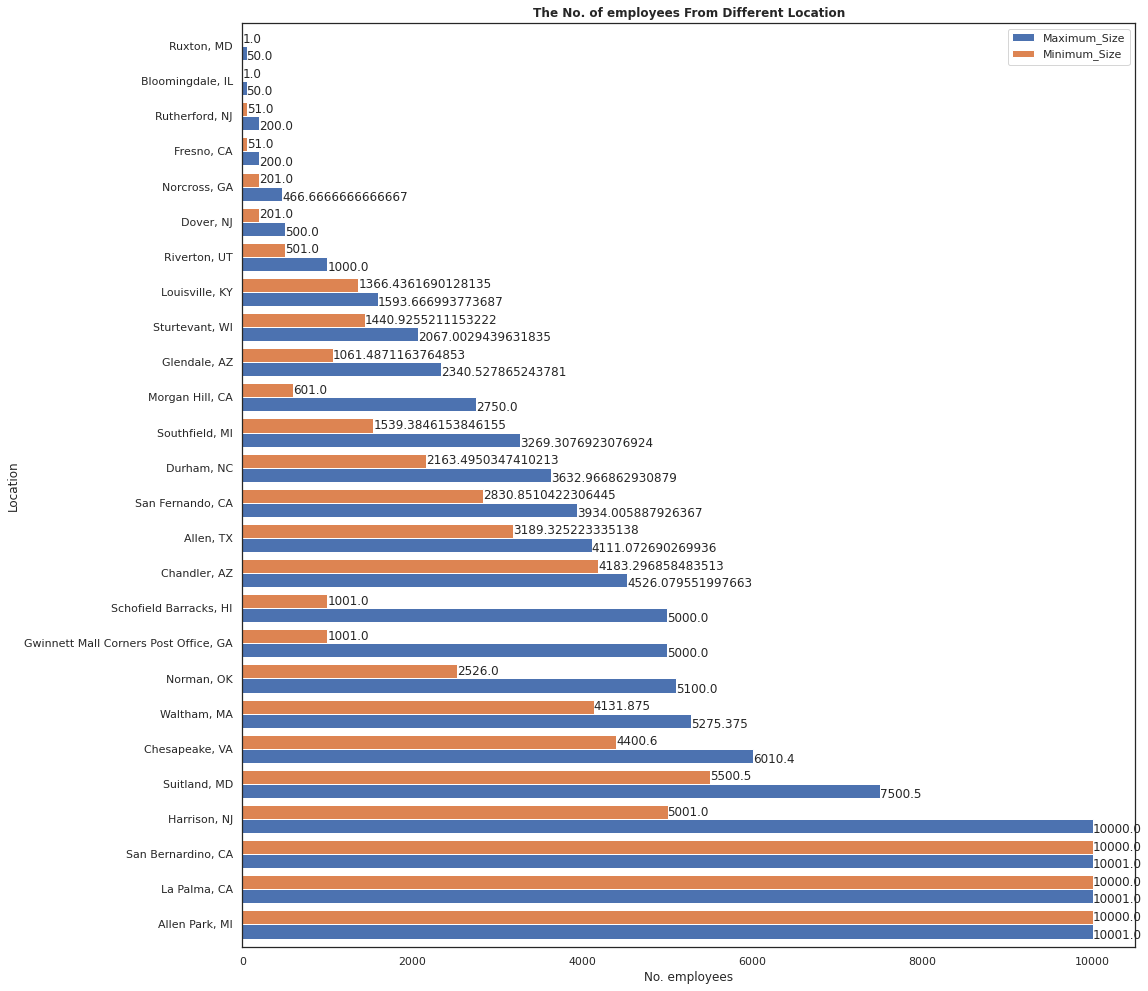

In [82]:
location_VS_size_em.plot(kind="barh", figsize=(16,17), width=0.8)
plt.ylabel("Location")
plt.xlabel("No. employees")
plt.title("The No. of employees From Different Location", fontweight="bold")

for index, value in enumerate(location_VS_size_em["Maximum_Size"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(location_VS_size_em["Minimum_Size"]):
    plt.text(value + 0.2, index + 0.1, str(value))

> #### <a>The next column is (`Founded`)

> This column contains `4133` missing values And its size is more than a `quarter` of the data

> Therefore, I do not want to d it drop away and I want to fill it in 2022, which is the date of the current year, considering that companies that do not have a date of incorporation are new companies and did not complete the registration.

In [83]:
#Checking for null values for 'Founded'columns
df['Founded'].isnull().sum()

4133

In [84]:
df['Founded'].value_counts()

2008.0    601
1999.0    443
2002.0    398
2000.0    356
1998.0    328
         ... 
1698.0      1
1807.0      1
1822.0      1
1846.0      1
1630.0      1
Name: Founded, Length: 217, dtype: int64

In [85]:
# fill an with 2022 value
df.Founded = df.Founded.fillna(value=2022.0)

In [86]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2229  14.203785
Sector                                2226  14.184668
Revenue                                899   5.728669
Type of ownership                      899   5.728669
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_estimate_lower_bound              0   0.000000
Easy Apply                               0   0.000000
Job Title                                0   0.000000
Job Description                          0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                             0   0.000000
Rating                                   0   0.000000
size_average                

> The virtualization for The 15 newest companies in terms of incorporation

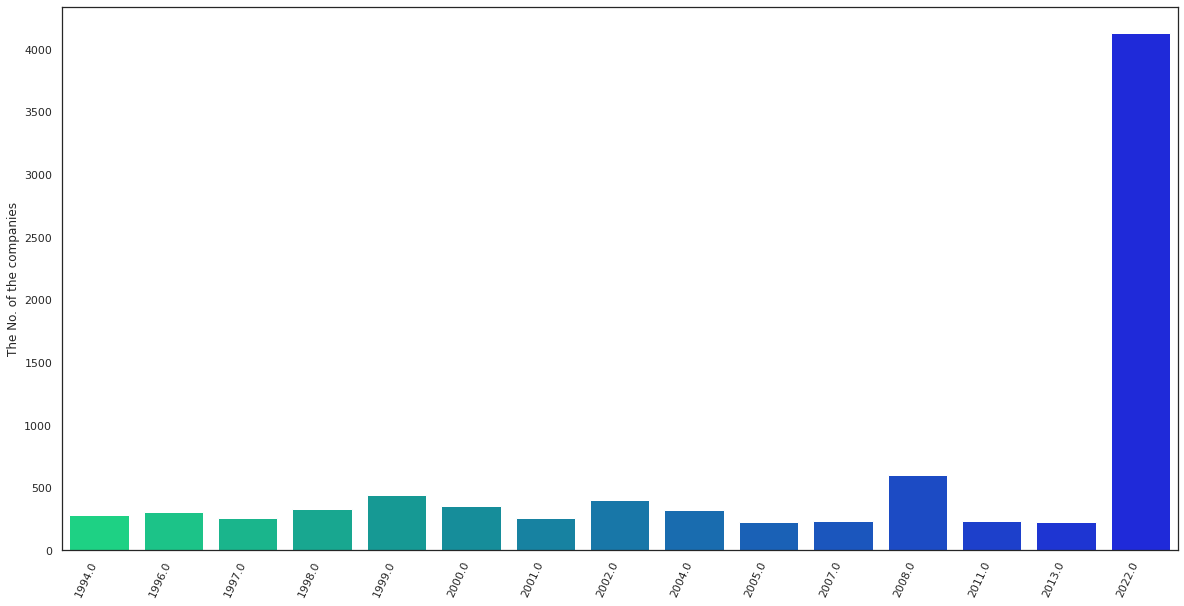

In [87]:
plt.figure(figsize=(20,10))

var_ = df['Founded'].value_counts().head(15)

chart = sns.barplot( data=df, x=var_.index, y=var_.values, palette='winter_r')

chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',)
chart.axes.yaxis.label.set_text("The No. of the companies")

> #### <a>The next column is (`Type of ownership`)

> This column contains `899` missing values And its size is more than a `quarter` of the data



In [88]:
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2229  14.203785
Sector                                2226  14.184668
Revenue                                899   5.728669
Type of ownership                      899   5.728669
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_estimate_lower_bound              0   0.000000
Easy Apply                               0   0.000000
Job Title                                0   0.000000
Job Description                          0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                             0   0.000000
Rating                                   0   0.000000
size_average                

In [89]:
# to get all the diffetent values
df['Type of ownership'].unique()

array(['Company - Private', 'Unknown', 'Company - Public',
       'Nonprofit Organization', nan, 'Government', 'Hospital',
       'Self-employed', 'Subsidiary or Business Segment',
       'School / School District', 'Contract', 'Private Practice / Firm',
       'College / University', 'Franchise', 'Other Organization'],
      dtype=object)

> I have an idea to replace any nan and unknown value with `other organization` value.

In [90]:
# to replace any nan and unknown value with other organizaiton .
df['Type of ownership'] = df['Type of ownership'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(['Unknown', np.nan],'Other_Organization')

In [91]:
df['Type of ownership'].unique()

array(['Company_Private', 'Other_Organization', 'Company_Public',
       'Nonprofit_Organization', 'Government', 'Hospital',
       'Self_employed', 'Subsidiary_or_Business_Segment',
       'School_School_District', 'Contract', 'Private_Practice_Firm',
       'College_University', 'Franchise'], dtype=object)

In [92]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2229  14.203785
Sector                                2226  14.184668
Revenue                                899   5.728669
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_estimate_lower_bound              0   0.000000
Easy Apply                               0   0.000000
Job Title                                0   0.000000
Job Description                          0   0.000000
Type of ownership                        0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                             0   0.000000
Rating                                   0   0.000000
size_average                

> The distibution of the values

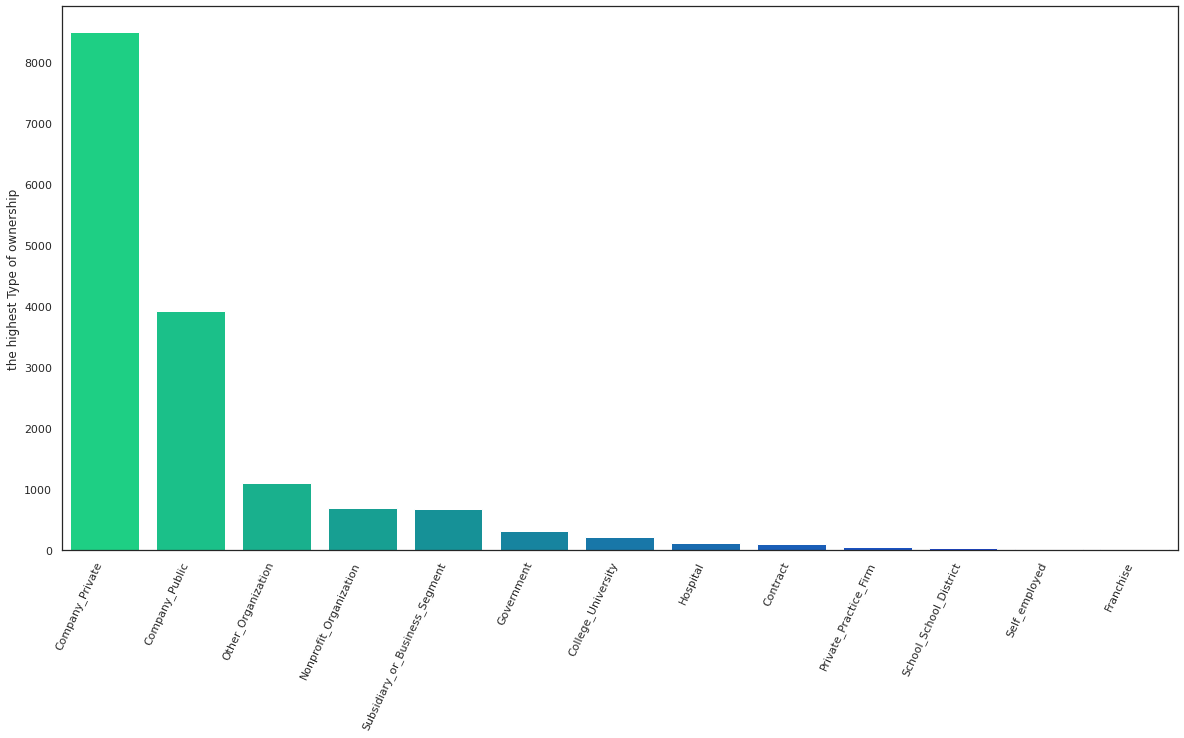

In [93]:
#display the distibution of the values
plt.figure(figsize=(20,10))

var_ = df['Type of ownership'].value_counts().head(15)

chart = sns.barplot( data=df, x=var_.index, y=var_.values, palette='winter_r')

chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',)
chart.axes.yaxis.label.set_text("the highest Type of ownership")

In [94]:
data = pd.DataFrame(df['Type of ownership'].value_counts().head(15))

import plotly.express as px
fig = px.pie(data, values=data['Type of ownership'], names=data.index,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title = 'Types of ownership')
fig.show()

> So `54.1%` Type of ownership are Private companies.

> #### <a>The next column is (`Revenue`)

> This column contains `899` missing values And its size is more than a `5%` of the data



In [95]:
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2229  14.203785
Sector                                2226  14.184668
Revenue                                899   5.728669
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
salary_estimate_lower_bound              0   0.000000
Easy Apply                               0   0.000000
Job Title                                0   0.000000
Job Description                          0   0.000000
Type of ownership                        0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                             0   0.000000
Rating                                   0   0.000000
size_average                

In [96]:
# to get all the diffetent values
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$100 to $500 million (USD)',
       '$500 million to $1 billion (USD)', '$10+ billion (USD)',
       '$25 to $50 million (USD)', '$1 to $5 million (USD)',
       '$5 to $10 billion (USD)', nan, '$5 to $10 million (USD)',
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$2 to $5 billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)'], dtype=object)

> Cleaning the Revenue column

In [97]:
# to replace Unknown / Non-Applicable , $ , , ( , ) with None
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', None)
df['Revenue'] = df['Revenue'].str.replace('$', ' ')
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ')
df['Revenue'] = df['Revenue'].str.replace('(', ' ')
df['Revenue'] = df['Revenue'].str.replace(')', ' ')
df['Revenue'] = df['Revenue'].str.replace(' ', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [98]:
# to get all the diffetent values
df['Revenue'].unique()

array(['Unknown/Non-Applicable', '100to500million',
       '500millionto1billion', '10+billion', '25to50million',
       '1to5million', '5to10billion', nan, '5to10million',
       '50to100million', '1to2billion', '2to5billion', 'Lessthan1million',
       '10to25million'], dtype=object)

> * `2to5billion` = `2billionto5billion` 
* `5to10billion` = `5billionto10billion` 
* `10+billion`= `10billionto11billion` 
* `Lessthan1million`= `0millionto1million`

In [99]:
df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion ')
df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10+billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')

In [100]:
# to get all the diffetent values
df['Revenue'].unique()

array(['Unknown/Non-Applicable', '100to500million',
       '500millionto1billion', '10billionto11billion', '25to50million',
       '1to5million', '5to10billion', nan, '5to10million',
       '50to100million', '1to2billion', '2billionto5billion',
       '0millionto1million', '10to25million'], dtype=object)

> convert any billion value with million

In [101]:
df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')
df['Revenue'] = df['Revenue'].replace('Unknown/Non-Applicable', np.nan)

In [102]:
# to get all the diffetent values
df['Revenue'].unique()

array([nan, '100to500 ', '500 to1000 ', '10000 to11000 ', '25to50 ',
       '1to5 ', '5to10000 ', '5to10 ', '50to100 ', '1to2000 ',
       '2000 to5000 ', '0 to1 ', '10to25 '], dtype=object)

> Creating two separate columns of Revenue as Minimum and Maximum Revenue

In [103]:
# spliting fun.
Revenue = df['Revenue'].str.split("to",expand=True)

df['Minimum_Revenue'] = Revenue[0]
df['Maximum_Revenue'] = Revenue[1]
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,salary_average,Minimum_Size,Maximum_Size,size_average,Minimum_Revenue,Maximum_Revenue
0,SENIOR DATA_SCIENTIST,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",2007.0,Company_Private,Travel Agencies,Travel & Tourism,NaN,0,111.000000,181.00000,146.000000,501.0,1000.0,750.5,NaN,NaN
1,DATA_SCIENTIST,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",2008.0,Company_Private,"Health, Beauty, & Fitness",Consumer Services,NaN,0,111.000000,181.00000,146.000000,1001.0,5000.0,3000.5,NaN,NaN
2,DATA_SCIENCE MANAGER,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",2022.0,Other_Organization,NaN,NaN,NaN,1,111.000000,181.00000,146.000000,1.0,50.0,25.5,NaN,NaN
3,DATA_ANALYST,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",2019.0,Company_Private,Internet,Information Technology,NaN,0,111.000000,181.00000,146.000000,201.0,500.0,350.5,NaN,NaN
4,DIRECTOR,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",2007.0,Company_Private,Advertising & Marketing,Business Services,NaN,0,111.000000,181.00000,146.000000,51.0,200.0,125.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,CLOUD ENGINEER,The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",2022.0,Company_Private,Computer Hardware & Software,Information Technology,1to5,0,76.000000,128.00000,102.000000,1.0,50.0,25.5,1,5
16156,ELECTRICAL ENGINEER,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",1993.0,Company_Private,Staffing & Outsourcing,Business Services,5to10,0,76.000000,128.00000,102.000000,51.0,200.0,125.5,5,10
16157,SENIOR BIG_DATA_ENGINEER,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",2022.0,Company_Private,IT Services,Information Technology,100to500,0,76.000000,128.00000,102.000000,501.0,1000.0,750.5,100,500
16158,SENIOR BIG_DATA_ETL ENGINEER,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",2022.0,Company_Public,NaN,NaN,100to500,0,64.795407,108.33383,86.564618,501.0,1000.0,750.5,100,500


In [104]:
df['Maximum_Revenue'] = pd.to_numeric(df['Maximum_Revenue'])
df['Minimum_Revenue'] = pd.to_numeric(df['Minimum_Revenue'])

> By now we don't need `revenue` column 

In [105]:
# drop fn.
df.drop('Revenue',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



> now we will handel the missing values with the `IterativeImputer` class

In [106]:
# create a list with columns names .
col_names = ['Maximum_Revenue', 'Minimum_Revenue']

# Use IterativeImputer to predict missing values.
imputer = IterativeImputer(max_iter=10)
# Fit to data, then transform it.
df[col_names] = imputer.fit_transform(df[col_names])

# create salary average column.
df['Revenue_average'] = (df['Maximum_Revenue'] + df['Minimum_Revenue']) / 2

In [107]:
# To get the missing values for each column
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2229  14.203785
Sector                                2226  14.184668
Job Title                                0   0.000000
salary_estimate_lower_bound              0   0.000000
Maximum_Revenue                          0   0.000000
Minimum_Revenue                          0   0.000000
size_average                             0   0.000000
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
Easy Apply                               0   0.000000
Job Description                          0   0.000000
Type of ownership                        0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                

> #### <a> Data Science Job Revenue Distribution

In [108]:
fig = px.histogram(df, x="Revenue_average", marginal="box",color_discrete_sequence=['indianred'])
fig.show()

> #### But let's try to remove the outliers from `Revenue_average` column .

In [109]:
# calculate Q1 and Q3
Q1 = df['Revenue_average'].quantile(0.25)
Q3 = df['Revenue_average'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

In [110]:
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)
df[ df['Revenue_average'] > (Q3+1.5*IQR)]
df = df[ df['Revenue_average'] < (Q3+1.5*IQR)]
df.shape

8693.75
-5156.25


(13134, 20)

In [111]:
# to make sure that every thing is okay
fig = px.histogram(df, x="Revenue_average", marginal="box",color_discrete_sequence=['indianred'])
fig.show()

> As we can see , we get a new distribution of our variable with a new IQR. With the new IQR other values can be outliers that were not outliers with the IQR of the original variable (and therefore are not removed). Thus, you need to rerun the previous two cells again and again as long as there are outliers.

> #### <a>The next columns are (`Industry & Sector`)

> This column contains `2011` missing values And its size is more than a `~15%` of the data

> Generally, replacing the missing values with the mean/median/mode is a crude way of treating missing values. Depending on the context, like if the variation is low or if the variable has low leverage over the response, such a rough approximation is acceptable and could give satisfactory results. 

> But maybe, with this way, The data can be biased.



In [112]:
# just call this fun.
ratio_meth()

                             Total missing  % missing
Industry                              2011  15.311406
Sector                                2009  15.296178
Job Title                                0   0.000000
salary_estimate_lower_bound              0   0.000000
Maximum_Revenue                          0   0.000000
Minimum_Revenue                          0   0.000000
size_average                             0   0.000000
Maximum_Size                             0   0.000000
Minimum_Size                             0   0.000000
salary_average                           0   0.000000
salary_estimate_upper_bound              0   0.000000
Easy Apply                               0   0.000000
Job Description                          0   0.000000
Type of ownership                        0   0.000000
Founded                                  0   0.000000
Headquarters                             0   0.000000
Location                                 0   0.000000
Company Name                

> Replace missing values with the most frequent value.

In [113]:
# source : https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/#:~:text=%E2%80%93%20Generally%2C%20replacing%20the%20missing%20values,and%20could%20give%20satisfactory%20results.

df = df.fillna(df.mode().iloc[0])
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,salary_average,Minimum_Size,Maximum_Size,size_average,Minimum_Revenue,Maximum_Revenue,Revenue_average
0,SENIOR DATA_SCIENTIST,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",2007.0,Company_Private,Travel Agencies,Travel & Tourism,0,111.0,181.0,146.0,501.0,1000.0,750.5,1984.795117,3154.628,2569.711558
1,DATA_SCIENTIST,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",2008.0,Company_Private,"Health, Beauty, & Fitness",Consumer Services,0,111.0,181.0,146.0,1001.0,5000.0,3000.5,1984.795117,3154.628,2569.711558
2,DATA_SCIENCE MANAGER,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",2022.0,Other_Organization,IT Services,Information Technology,1,111.0,181.0,146.0,1.0,50.0,25.5,1984.795117,3154.628,2569.711558
3,DATA_ANALYST,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",2019.0,Company_Private,Internet,Information Technology,0,111.0,181.0,146.0,201.0,500.0,350.5,1984.795117,3154.628,2569.711558
4,DIRECTOR,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",2007.0,Company_Private,Advertising & Marketing,Business Services,0,111.0,181.0,146.0,51.0,200.0,125.5,1984.795117,3154.628,2569.711558


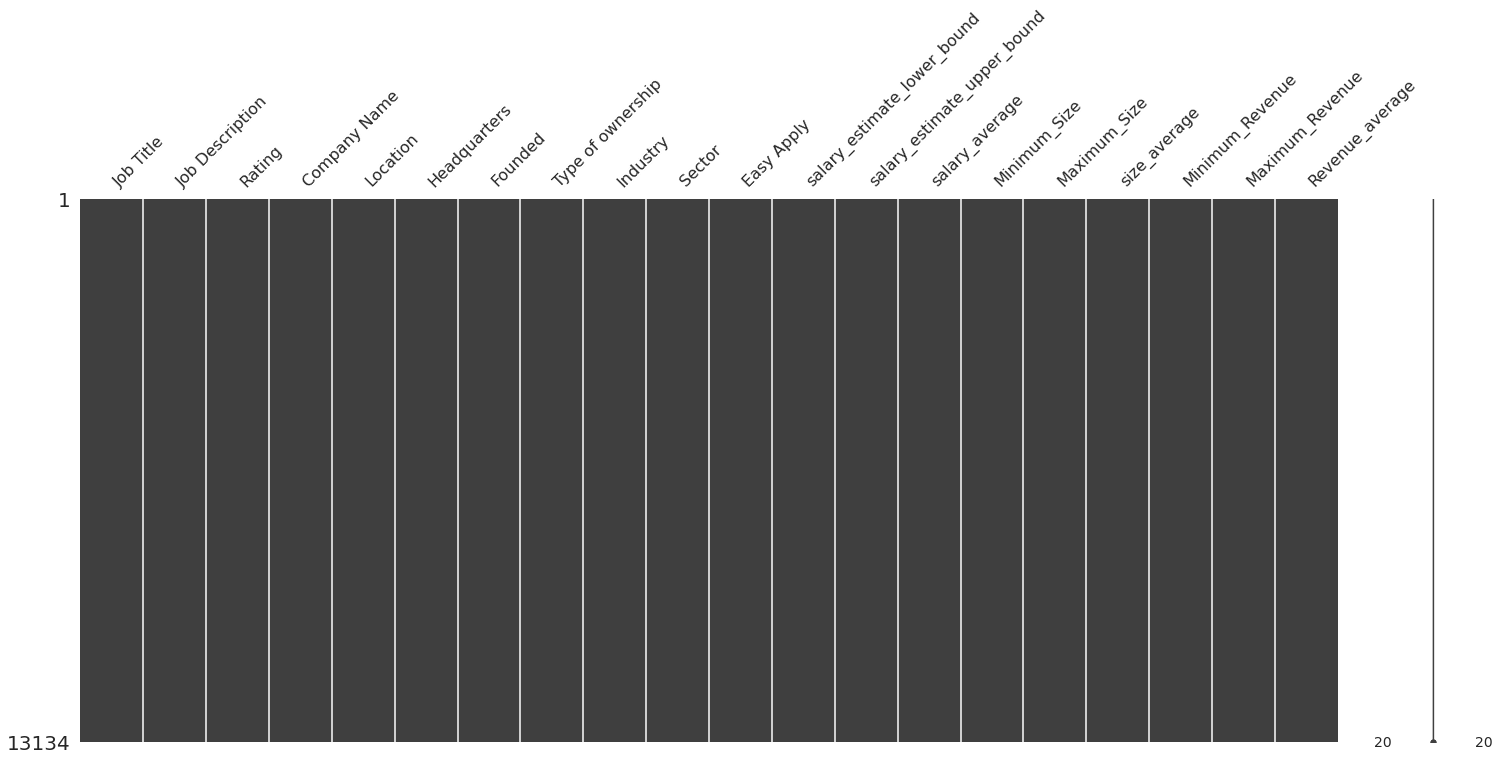

In [114]:
# visualize missing values as a matrix
msno.matrix(df)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



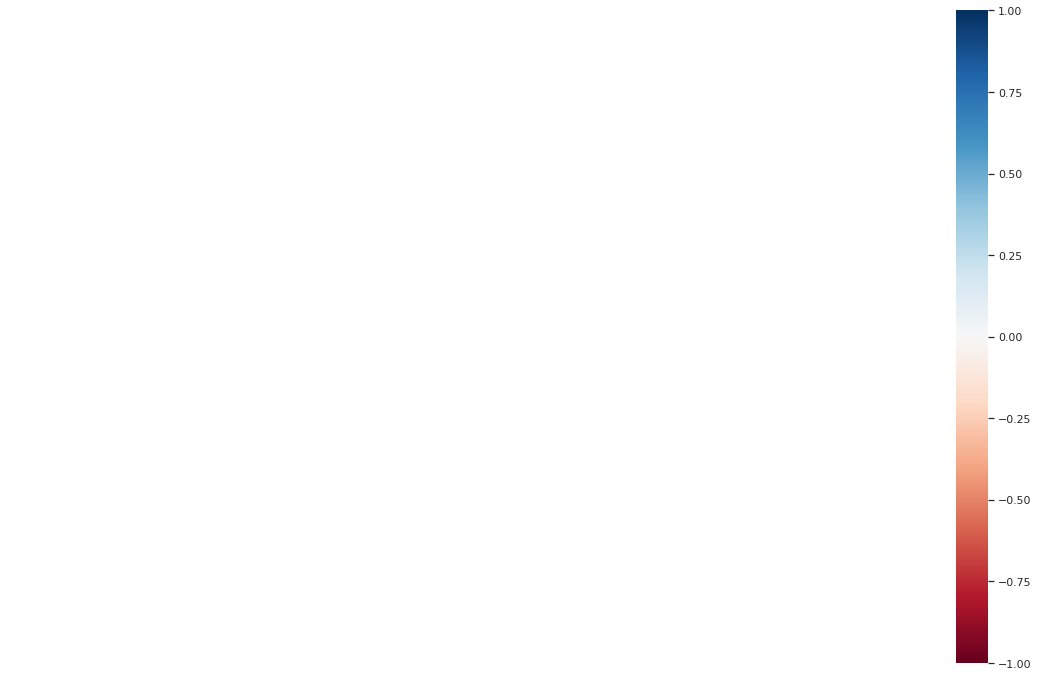

In [115]:
# heapmap for correlation analysis
msno.heatmap(df)

In [116]:
df['Industry'].value_counts()

IT Services                         4069
Staffing & Outsourcing              1609
Consulting                           834
Computer Hardware & Software         772
Health Care Services & Hospitals     657
                                    ... 
Mining                                 1
Funeral Services                       1
Commercial Equipment Rental            1
Museums, Zoos & Amusement Parks        1
Music Production & Distribution        1
Name: Industry, Length: 115, dtype: int64

In [117]:
df['Sector'].value_counts()

Information Technology                5699
Business Services                     3067
Finance                                764
Health Care                            657
Biotech & Pharmaceuticals              321
Manufacturing                          316
Education                              293
Government                             271
Insurance                              250
Accounting & Legal                     223
Aerospace & Defense                    197
Retail                                 195
Media                                  165
Oil, Gas, Energy & Utilities           126
Non-Profit                             112
Transportation & Logistics              95
Consumer Services                       80
Telecommunications                      79
Construction, Repair & Maintenance      71
Real Estate                             55
Restaurants, Bars & Food Services       38
Arts, Entertainment & Recreation        27
Travel & Tourism                        18
Agriculture

In [118]:
data = pd.DataFrame(df['Sector'].value_counts().head(15))

import plotly.express as px
fig = px.pie(data, values=data['Sector'], names=data.index,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title = 'Sector')
fig.show()


> So `45.9%` is Information Technology

In [119]:
data = pd.DataFrame(df['Industry'].value_counts().head(15))

import plotly.express as px
fig = px.pie(data, values=data['Industry'], names=data.index,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title = 'Industry')
fig.show()


> So `37.8.9%` is IT Services

> # <a> Question (4) 

>  Briefly describe your feature engineering plan (at least two columns should be involved). No coding needed.

> * First and foremost, we attempted to comprehend our dataset in order to gain a better understanding of it.

> * Continue to get basic information from the dataframe after having an overview and understanding the variables.

> * We ran several procedures and made necessary adjustments to specific columns based on the findings of the basic information from the data set.

> * We used a graphic representation of the variables to examine the correlations between them.

> * and we attempted to analyse the dataset based on the relationships between variables.

> Such as : `Job Title` column

>  - We noticed that the `job title` column has some rows with the name of the deparment name and the job title itself
So, we separated them from each other

> - Remove any special characters

> - There are some names in the job title I renamed like: `DATA ANALYST - SENIOR` = `SENIOR DATA ANALYST`

> - **Note:** There are no missing values in the Job Title column

> The second solumn is `Salary Estimate` :

> - The type of the `Salary Estimate` column is `object`. It is not possible to perform mathematical operations that make use of the numerical values in the column values.So we tried to convert it into numerical form like `$132K-$208K (Glassdoor est.)` converted to `($111K-$181K)`

> - There are 48 missing values. So , after separete this column into `salary_estimate_lower_bound` & `salary_estimate_upper_bound` columns we droped the `salary estimate` column 

> - we handeled the missing values in `salary_estimate_lower_bound` & `salary_estimate_upper_bound` columns by using teh 'IterativeImputer' class. Because they were `MAR` Missing At Random mechanism values.

> - I also do some Distribution to ask and answer some questions 

> - We identified the outliers and we used the `IQR` method which used to highlight outliers in the boxplot . we can use it to find outliers in the dataset

# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned to each cell separately.




> [pie-charts](https://plotly.com/python/pie-charts/)

> [visualisation-of-pie-charts-by-matplotlib](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

>[drop-dataframe-columns-based-on-nan-percentage]( https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/)


> [get-lots-of-insights-from-your-data]( https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)

>[deletion-outliers-near-maximum-remaining](https://stackoverflow.com/questions/61666884/after-deletion-outliers-near-maximum-remaining-in-r-boxplot)

> [data-scientist-jobs](https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs)

>[remove-outliers](https://statisticsbyjim.com/basics/remove-outliers/)

> [why-you-shouldnt-just-delete-outliers]( https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/)

> [gallery-pie-and-polar-charts-pie-features](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)

